# Notebook - Gridworld - ValueIteration - withFunctions

[???INTRO: IN QUESTO PROGETTO ABBIAMO FATTO...]
[???AGGIUNGERE INDICE]

What we call a "gridworld" is, essentially, a grid of `Lx` columns and `Ly` rows. At each iteration the agent will be in a cell of this grid; the actions that it is allowed to do are:
- move to the right cell
- move to the left cell
- move to the cell above
- move to the cell below

An amount of cells equal to `Nblocks` is seen as walls (meaning that the agent cannot stay in those cells, nor can jump over them). A list of `goals` contains the coordinates of the cells that the agent aims to reach. Each goal-cell is associated with a reward, a value stored in the list `rewards_list`: when the agent succeeds in occupying a goal-cell it will get the associated reward.

Reached one of the goal-cell, the episode is over ("the game is over", but in a nice way because the agent won): the agent will not continue to play, so it will not aim to another goal-cell.

## Libraries

First of all we need to import the libraries and the files that we will need to execute the code. `PY_GW_VI_plot` is the file containing the functions useful to visually plot some information regarding the specific gridworld. `PY_GW_VI_tools` contains the functions that will be used to get information, manipulate and act on the gridworld.

In [1]:
import numpy as np
import PY_GW_VI_plot
import PY_GW_VI_tools
import time

## Example 1: Gridworld problem with one goal-cell

In this first example the grid contains just one goal-cell: the aim of the agent is to reach that cell, obtaining the reward that it carries. Let's define the parameters that describe the environment of the grid:

In [2]:
# width of the grid; height of the grid; amount of cells that are walls in the grid
Lx = 10 
Ly = 15
Nblocks = 40

# cells that are goals; amount of the rewards if the goals are reached
goal = [(9,9)]
rewards_list = [1]

# possible actions that the agent can do (i.e., how it moves in the grid).
# Observe that the way they are defined will make the computation of the new state easy
Actions = np.array([[1,0],[-1,0],[0,1],[0,-1]]) # respectively: right, left, up, down 

# the algorithm will stop after a certain amount of iterations max_n_of_iterations if it had not reached the
# desidered tolerance yet ( dist_2(V_(k+1) - V_(k)) < tolerance )
max_n_of_iterations = 300
tolerance = 0.001

# gamma is the discount factor, which expresses how far in the future we want your sum to contribute.
# The more gamma is high, the more forward-looking we are and take the future into account
gamma = 0.95

# probability that I take the action that maximises the V (V is the value of the policy).
# A value that is less than 1 means that with a probability 1 - p we will pick a random action (however,
# in the set of the random actions there is also the one that maximises the V)
p = 1

# random_flag=False means that the choice of the action is deterministic.
# Redundancy with p = 1, but the boolean value is safer to be used with comparisons (floats may give problems)
random_flag=False

Remark that we just set the amount `Nblocks` of the wall-cells, not their position in the grid.

Now that we have defined the parameters we can initialise the specific play ground that we call `World`, that is a concrete instance of a gridworld. The code will plot some visual images of the gridworld. A set of three images will display the gridworld:
- as it is
- with each cell containing its associated value of [???COSA, ESATTAMENTE?]
- with each cell containing the indication of the best action to choose for the following action

Our code will also print some information:
- whether we succeeded in having a value lower than `tolerance`
- at which iteration we got a value lower than `tolerance`

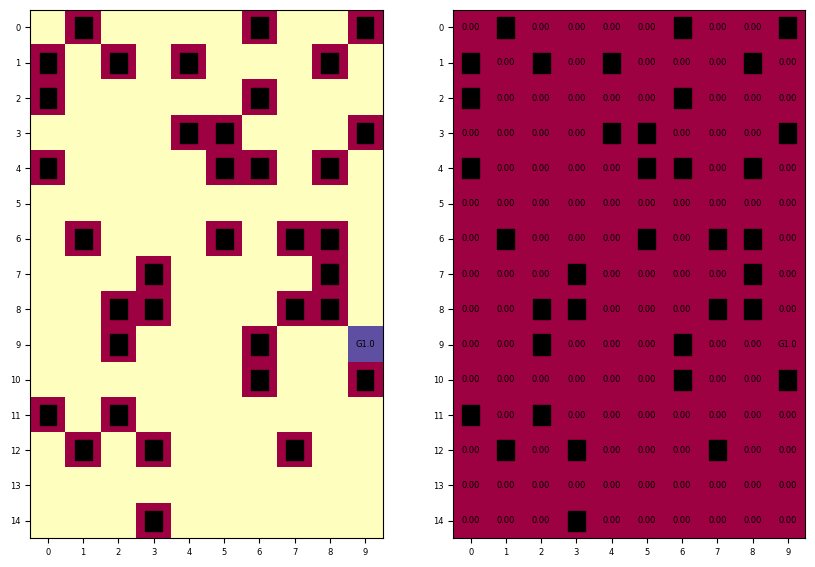

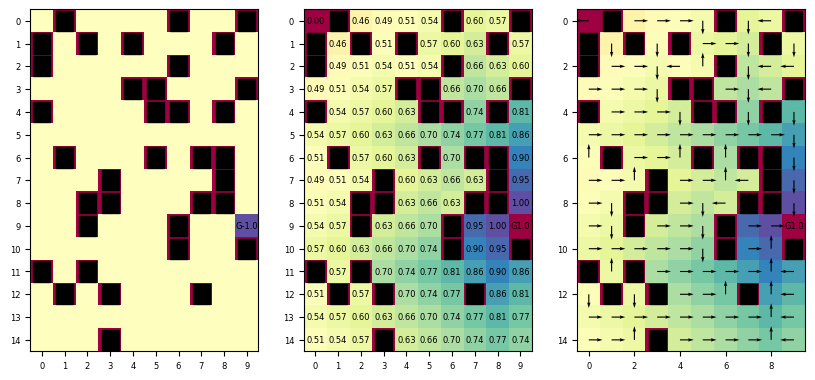

Yes, we converge w.r.t. our tolerance
Distance between V_16(S) and V_17(S) is: 0.0


In [3]:
# GRIDWORLD 1

# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

# Solve and plot
PY_GW_VI_plot.plot_world_values(World=World, Values=Values)
World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
    World = World,
    initial_values = Values,
    max_n_of_iterations = max_n_of_iterations,
    gamma = gamma,
    tolerance = tolerance,
    possible_actions = Actions,
    p = p,
    random_flag=random_flag)
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
print( PY_GW_VI_tools.get_info_about_result(result_info = result_info) )

Due to how the functions are built, observe that the same code may give a different instance (the position of the `Nblocks` wall-cells may vary):

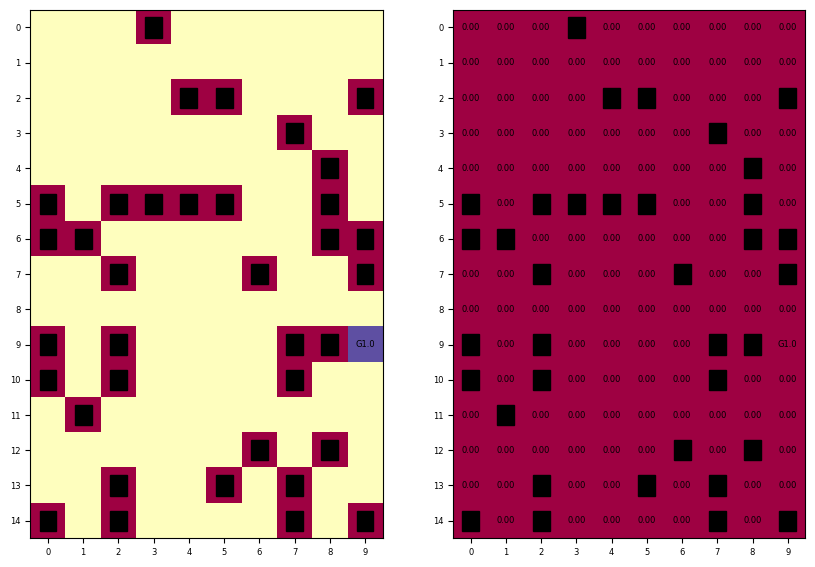

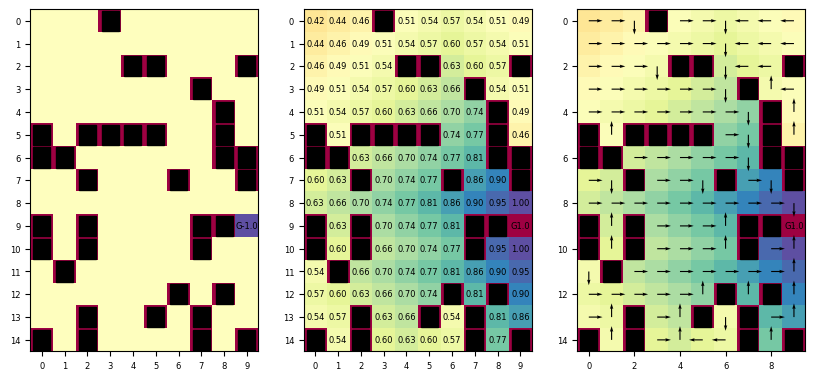

Yes, we converge w.r.t. our tolerance
Distance between V_18(S) and V_19(S) is: 0.0


In [4]:
# GRIDWORLD 2

# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

# Solve and plot
PY_GW_VI_plot.plot_world_values(World=World, Values=Values)
World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
    World = World,
    initial_values = Values,
    max_n_of_iterations = max_n_of_iterations,
    gamma = gamma,
    tolerance = tolerance,
    possible_actions = Actions,
    p = p,
    random_flag=random_flag)
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
print( PY_GW_VI_tools.get_info_about_result(result_info = result_info) )

### Tests

Let's now play a little with the code. We will observe what happens changing the values of:
- `max_n_of_iterations` (1)
- `gamma` (2)

and we will investigate:
- an average time to fall below the tolerance (3)
- number of iterations to converge (4)

#### (1) Changing `max_n_of_iterations`

max_n_of_iterations =  2


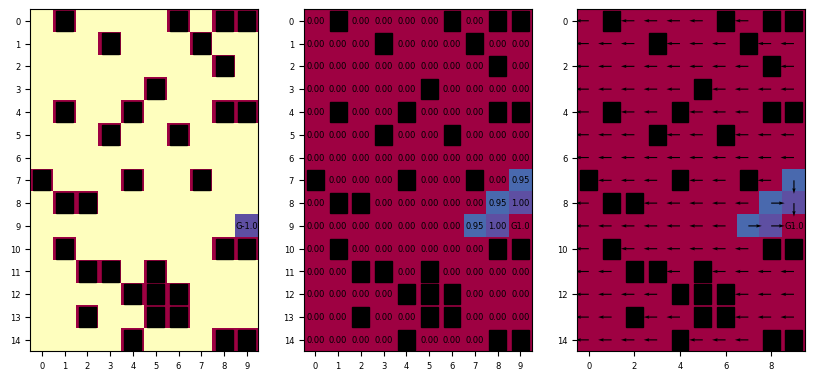

No, we stop before reaching the tolerance threshold
Distance between V_2(S) and V_3(S) is: 0.13435028842544403



max_n_of_iterations =  4


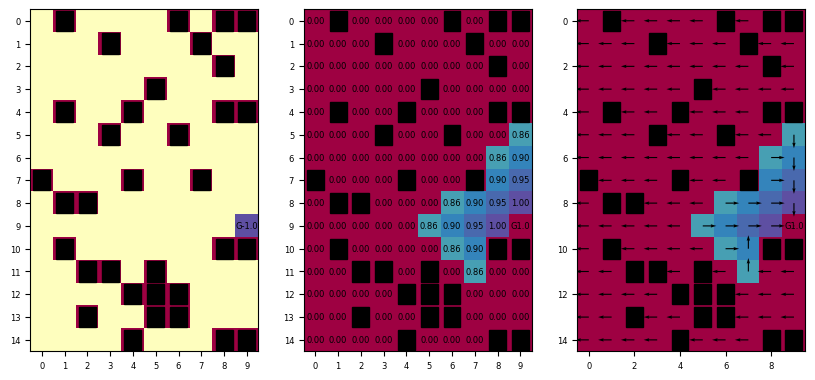

No, we stop before reaching the tolerance threshold
Distance between V_4(S) and V_5(S) is: 0.171475



max_n_of_iterations =  6


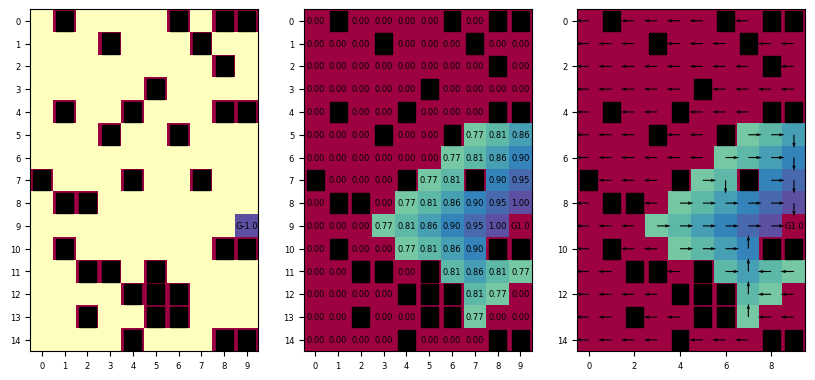

No, we stop before reaching the tolerance threshold
Distance between V_6(S) and V_7(S) is: 0.1895368469567401



max_n_of_iterations =  8


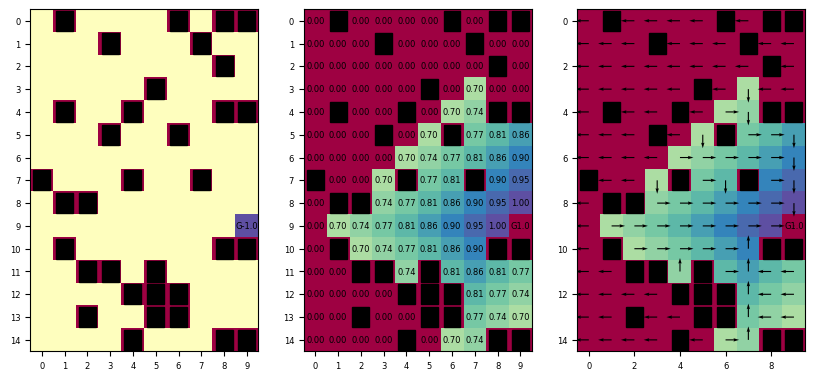

No, we stop before reaching the tolerance threshold
Distance between V_8(S) and V_9(S) is: 0.1710570043784579



max_n_of_iterations =  10


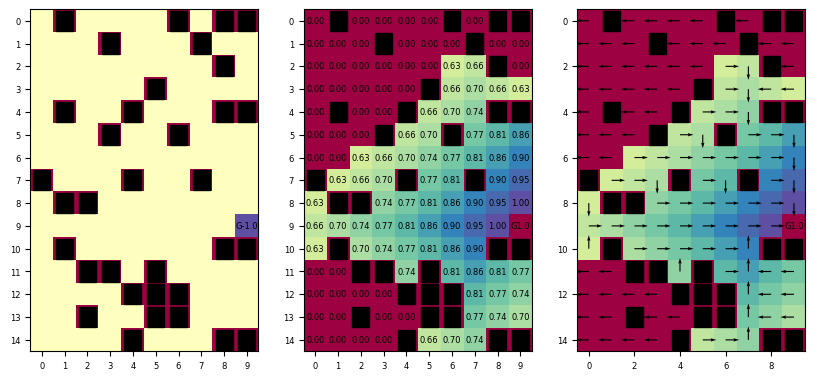

No, we stop before reaching the tolerance threshold
Distance between V_10(S) and V_11(S) is: 0.1260498819449218



max_n_of_iterations =  12


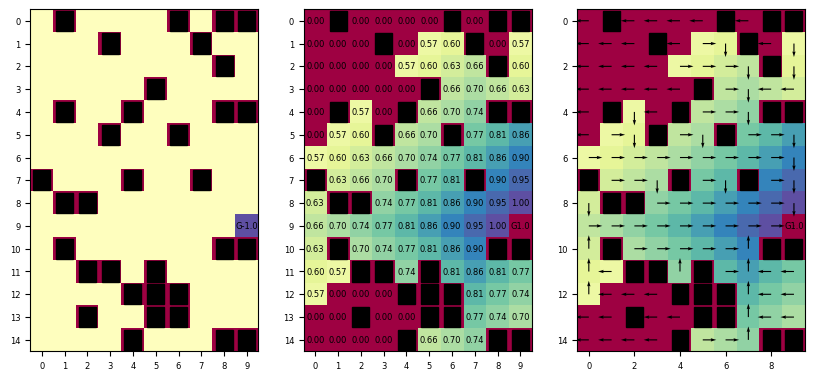

No, we stop before reaching the tolerance threshold
Distance between V_12(S) and V_13(S) is: 0.13135875455635918



max_n_of_iterations =  14


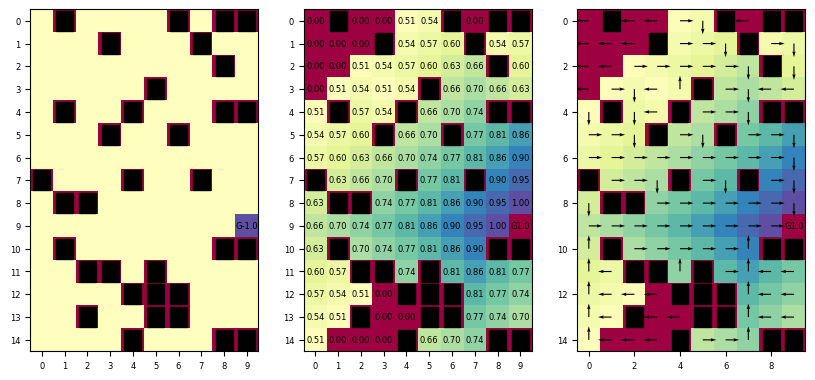

No, we stop before reaching the tolerance threshold
Distance between V_14(S) and V_15(S) is: 0.11855127598711412



max_n_of_iterations =  16


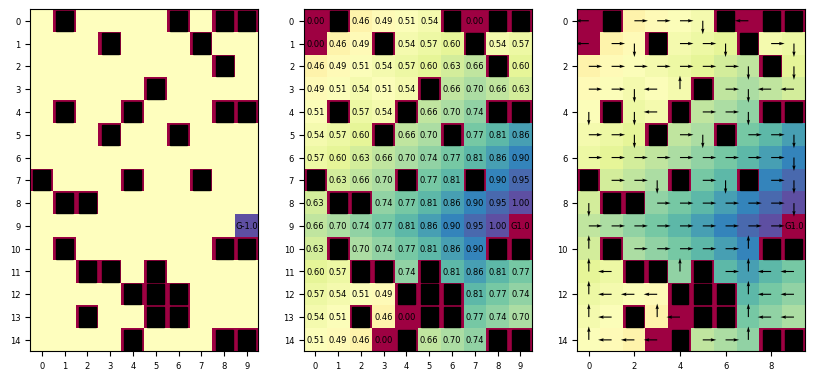

No, we stop before reaching the tolerance threshold
Distance between V_16(S) and V_17(S) is: 0.08458501915093813



max_n_of_iterations =  18


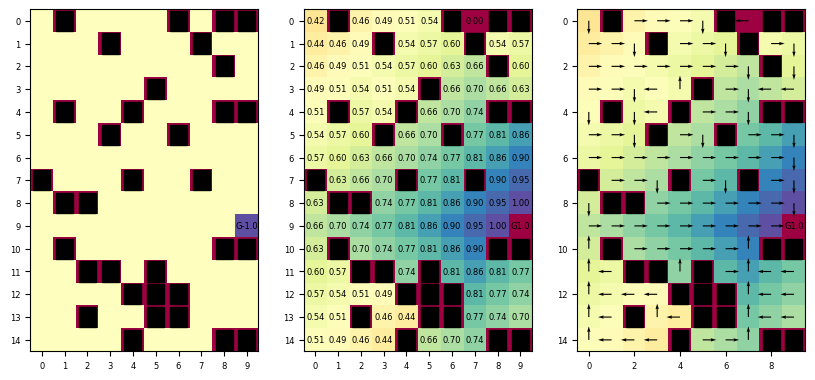

No, we stop before reaching the tolerance threshold
Distance between V_18(S) and V_19(S) is: 0.03413938241228127



max_n_of_iterations =  20


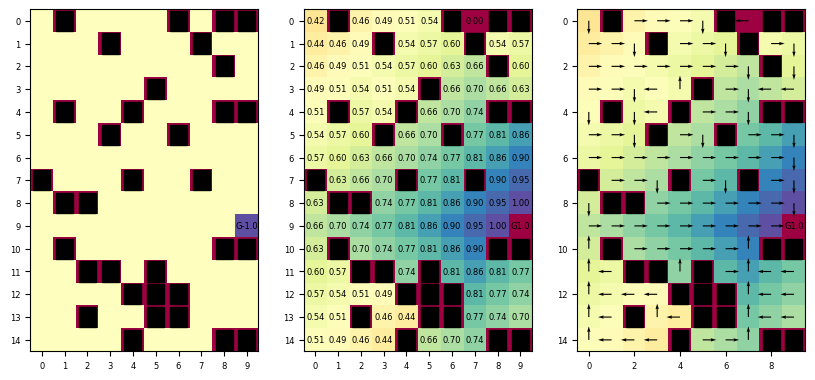

Yes, we converge w.r.t. our tolerance
Distance between V_18(S) and V_19(S) is: 0.0





In [5]:
# (1) Changing max_n_of_iterations: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10

for n in range(1, iterations_for + 1):
    print("max_n_of_iterations = ", n*2)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = n*2,
        gamma = gamma,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

Observe that the more high the number of iteration, the more far from the goal-cell we have the optimal indications to reach the aim. Somehow, the indications propagates from the goal-cell to the rest of the grid.

#### (2) Changing `gamma`

gamma =  0.1


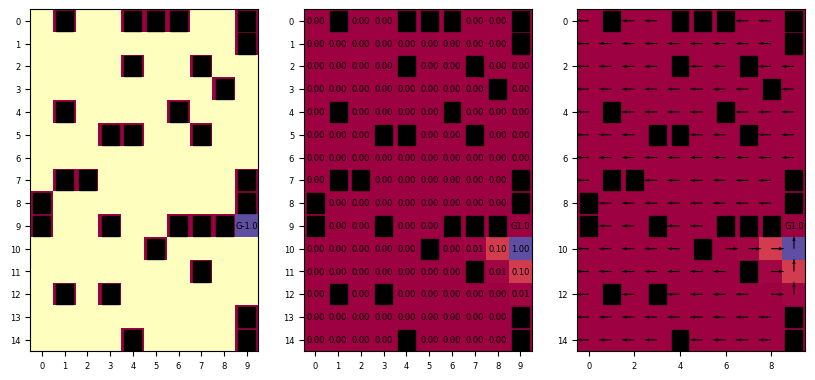

Yes, we converge w.r.t. our tolerance
Distance between V_3(S) and V_4(S) is: 0.00011547005383792517



gamma =  0.2


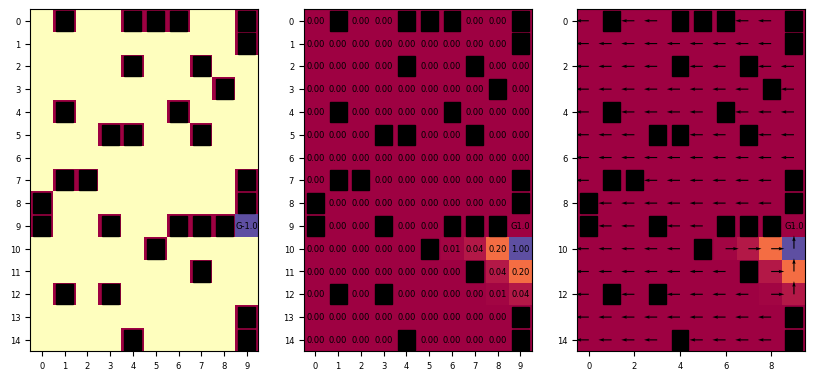

Yes, we converge w.r.t. our tolerance
Distance between V_3(S) and V_4(S) is: 0.0009237604307034014



gamma =  0.30000000000000004


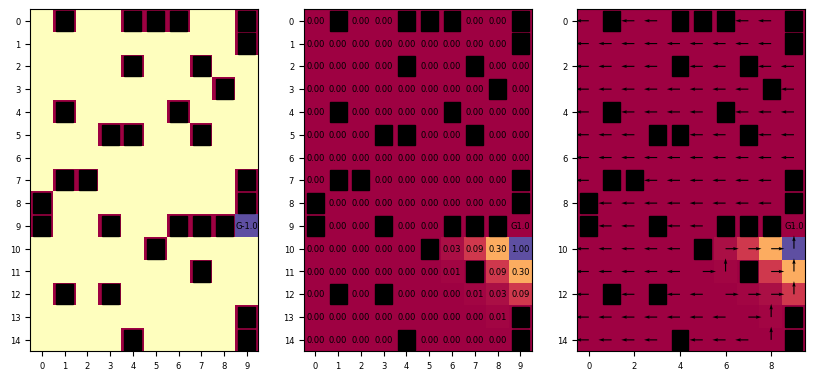

Yes, we converge w.r.t. our tolerance
Distance between V_5(S) and V_6(S) is: 0.0003968173383308751



gamma =  0.4


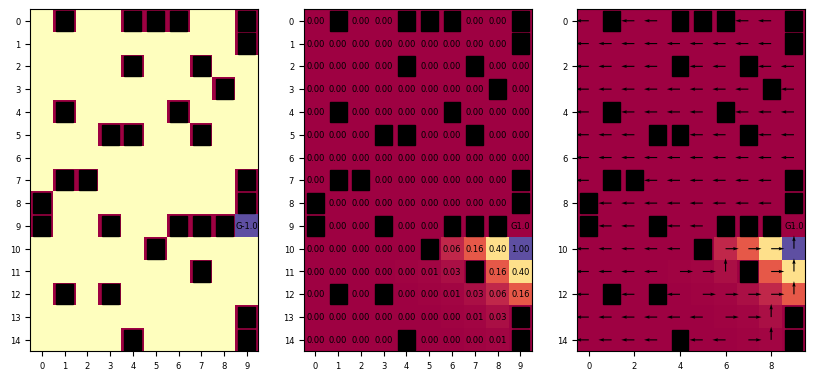

Yes, we converge w.r.t. our tolerance
Distance between V_6(S) and V_7(S) is: 0.0006688739990959934



gamma =  0.5


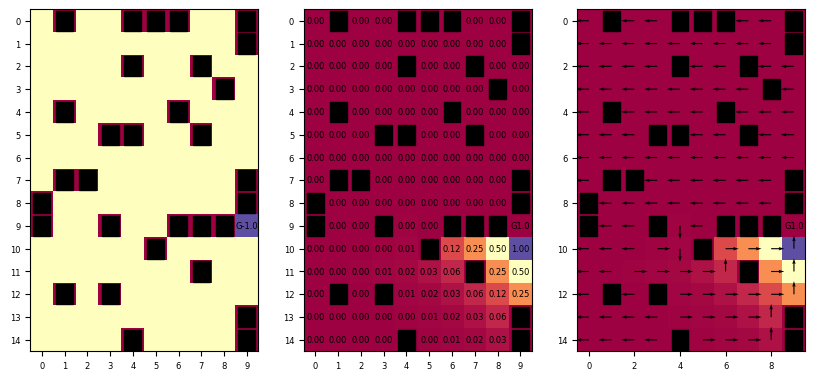

Yes, we converge w.r.t. our tolerance
Distance between V_8(S) and V_9(S) is: 0.000713180413418185



gamma =  0.6000000000000001


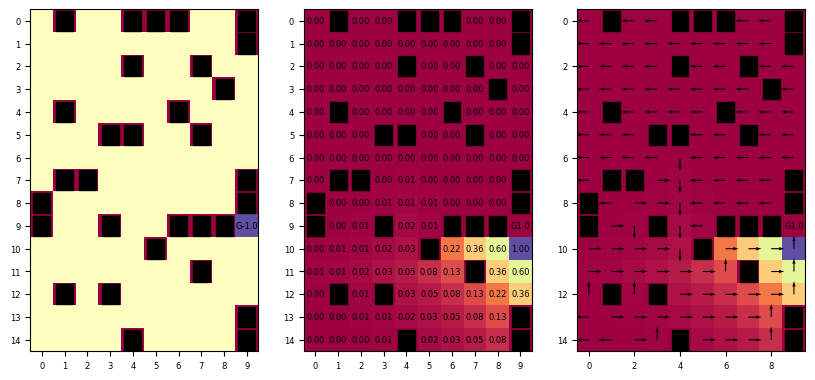

Yes, we converge w.r.t. our tolerance
Distance between V_11(S) and V_12(S) is: 0.0009367379706273879



gamma =  0.7000000000000001


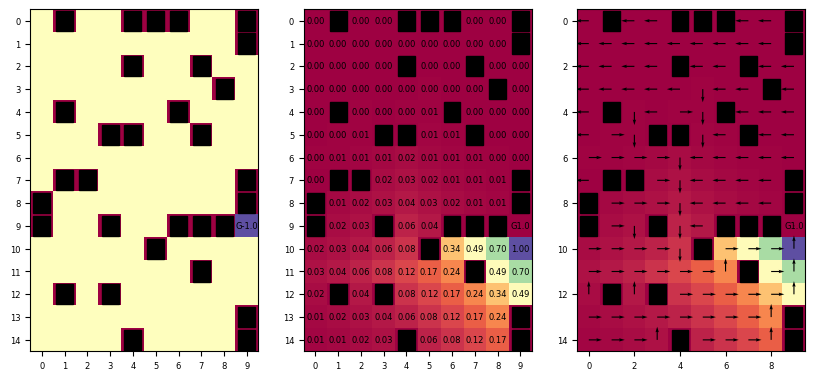

Yes, we converge w.r.t. our tolerance
Distance between V_15(S) and V_16(S) is: 0.0009495123019886012



gamma =  0.8


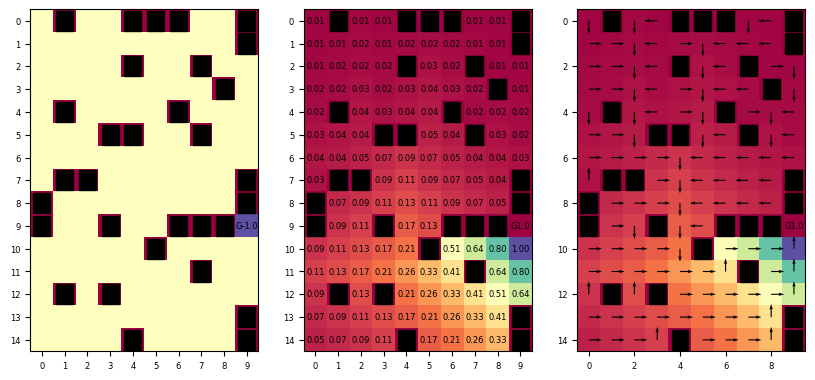

Yes, we converge w.r.t. our tolerance
Distance between V_22(S) and V_23(S) is: 0.0



gamma =  0.9


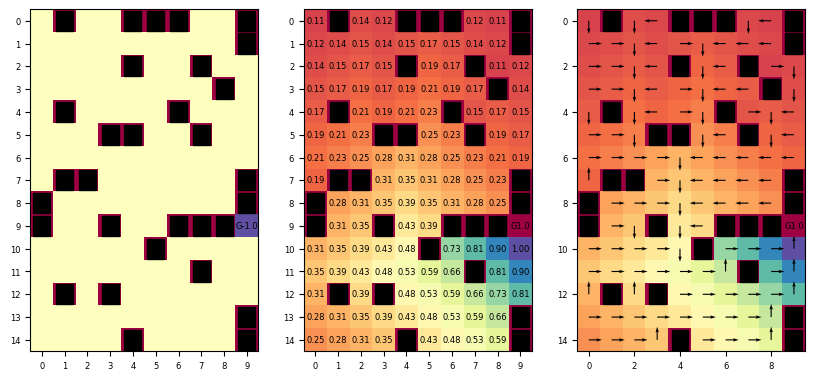

Yes, we converge w.r.t. our tolerance
Distance between V_22(S) and V_23(S) is: 0.0



gamma =  1.0


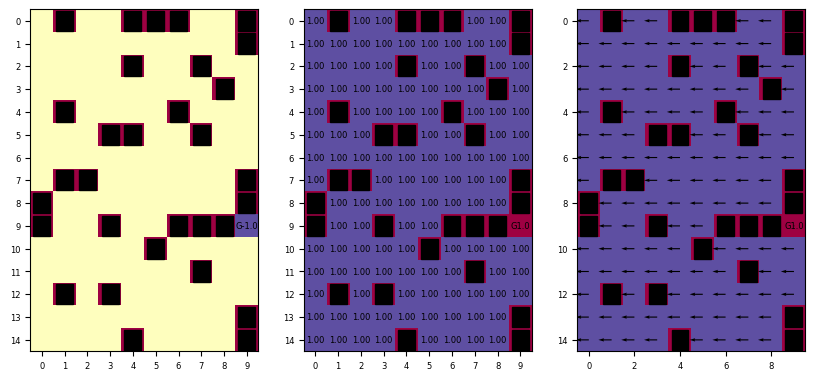

Yes, we converge w.r.t. our tolerance
Distance between V_22(S) and V_23(S) is: 0.0





In [6]:
# (2) Changing gamma: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10
max_n_of_iterations = 300

for n in range(1, iterations_for + 1):
    print("gamma = ", 0.1*n)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = max_n_of_iterations,
        gamma = 0.1*n,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

Here we observe that the less the value of gamma, the less the amount of iterations needed for convergence but, on the other hand, somehow the worse the result. As a matter of fact, starting from some cells we will not be able to reach the goal-cell following the provided indications or the path will not be optimised.

The more the value of gamma (except for `gamma = 1` ) the more high the number of iterations for convergence but the more optimised the result on the grid. [???AGGIUNGERE QUESTIONE SU GAMMA, perché no 1?]

#### (3) An average time to fall below `tolerance`

The generation of the gridworld is partially random since the amount `Nblock` is fixed but the position of the walls is not. Here we will investigate an average of the time to reach the convergence as a function of `Lx` and `Ly` (the time required to do the plots will not be considered). The value of `max_n_of_iterations` is important to set a stop condition to the algorithm: we assume that the value we chose is high enough and that the convergence happens before. However, this is not sure and one may play with the variables and the code to see how many times the convergences is reached and how many times it is not. A high value of `num_tests` helps to obtain a better estimation.

In [7]:
# (3) An average time to fall below the tolerance

def function_time(Lx, Ly, Nblocks, goal, rewards_list, max_n_of_iterations, gamma, p, random_flag, num_tests, tolerance = 0.001):

    times = []

    for i in range(1, num_tests + 1):

        # Build the world (and initial values)
        World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
        Values = np.zeros((Ly,Lx))

        start_time = time.time()

        # Solve and plot
        World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
            World = World,
            initial_values = Values,
            max_n_of_iterations = max_n_of_iterations,
            gamma = gamma,
            tolerance = tolerance,
            possible_actions = Actions,
            p = p,
            random_flag=random_flag)
    
        end_time = time.time()
        times.append(end_time - start_time)

    average_time = sum(times) / num_tests
    std_deviation = np.std(times)
    print(f"Lx = {Lx}; Ly = {Ly}")
    print(f"max_n_of_iterations = {max_n_of_iterations}; {num_tests} tests")
    print(f"Average time: {average_time} seconds")
    print(f"Standard deviation: {std_deviation} seconds")

function_time(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=15, Ly=15, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=20, Ly=20, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=25, Ly=25, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.06458288192749023 seconds
Standard deviation: 0.017560050923855517 seconds


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.11697928905487061 seconds
Standard deviation: 0.0253525217309926 seconds


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average time: 0.29397655963897706 seconds
Standard deviation: 0.09580255522200629 seconds


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average time: 0.547551097869873 seconds
Standard deviation: 0.06500944048802522 seconds




#### (4) Number of iterations to converge

Let's study the average amount of iterations needed to get the convergence (so to fall below the requested tolerance). Similarly to the case before, we assume to have a value of `max_n_of_iterations` that is high enough and will not be reached:

In [8]:
# (4) Number of iterations to converge

def function_convergence(Lx, Ly, Nblocks, goal, rewards_list, max_n_of_iterations, gamma, p, random_flag, num_tests, tolerance = 0.001):

    iterations_convergence = []

    for i in range(1, num_tests + 1):

        # Build the world (and initial values)
        World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
        Values = np.zeros((Ly,Lx))

        # Solve
        World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
            World = World,
            initial_values = Values,
            max_n_of_iterations = max_n_of_iterations,
            gamma = gamma,
            tolerance = tolerance,
            possible_actions = Actions,
            p = p,
            random_flag=random_flag)
        
        iterations_convergence.append(num_iter)

    average_iter = sum(iterations_convergence) / num_tests
    std_deviation = np.std(iterations_convergence)
    print(f"Lx = {Lx}; Ly = {Ly}")
    print(f"max_n_of_iterations = {max_n_of_iterations}; {num_tests} tests")
    print(f"Average amount of iterations: {average_iter}")
    print(f"Standard deviation: {std_deviation}")

function_convergence(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=15, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=20, Ly=20, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=25, Ly=25, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 19.62
Standard deviation: 3.560280887795231


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 18.96
Standard deviation: 0.7735631842325486


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 20.9
Standard deviation: 0.7


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 30.86
Standard deviation: 0.4004996878900157




## Example 2: Gridworld problem with multiple goal-cells

In this second example the grid contains more than one goal-cell: the aim of the agent is to reach one of those cells, obtaining the reward that it carries. Remember that the game is over when the agent succeeds in reaching a goal-cell. Depending on some factors (included the position of the agent) the target goal-cell will be different. 

Let's first define, again, the parameters that describe the environment of the grid:

In [9]:
# width of the grid; height of the grid; amount of cells that are walls in the grid
Lx = 10
Ly = 15
Nblocks = 40

# cells that are goals; amount of the rewards if the goals are reached.
# Remark that here we have two goals, and the rewards_list is therefore composed by two values
goal = [(13,8),(3,2)]
rewards_list = [10,1]

# the algorithm will stop after a certain amount of iterations max_n_of_iterations if it had not reached the
# desidered tolerance yet ( dist_2(V_(k+1) - V_(k)) < tolerance )
max_n_of_iterations = 300
tolerance = 0.001

# gamma is the discount factor, which expresses how far in the future we want your sum to contribute.
# The more gamma is high, the more forward-looking we are and take the future into account
gamma = 0.95

# probability that I take the action that maximises the V (V is the value of the policy).
# A value that is less than 1 means that with a probability 1 - p we will pick a random action (however,
# in the set of the random actions there is also the one that maximises the V)
p = 1

# random_flag=False means that the choice of the action is deterministic.
# Redundancy with p = 1, but the boolean value is safer to be used with comparisons (floats may give problems)
random_flag=False

Now we can create an instance of a gridworld:

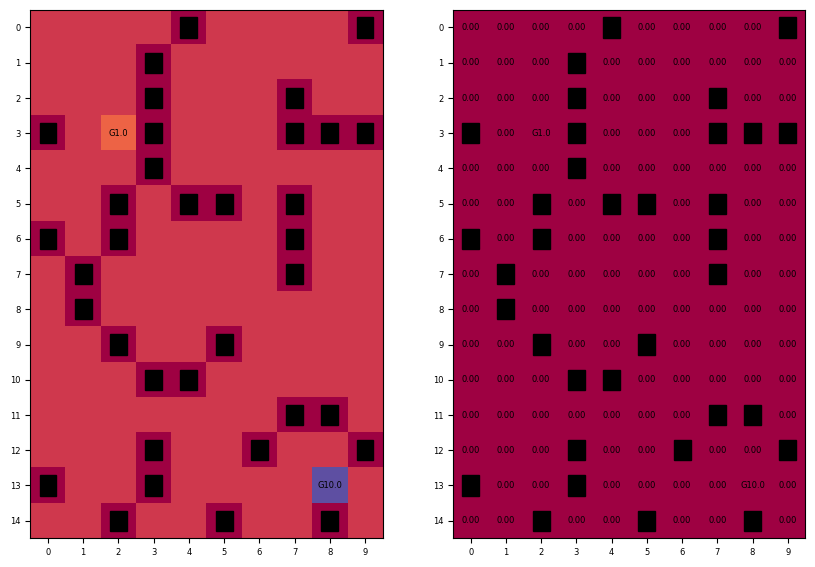

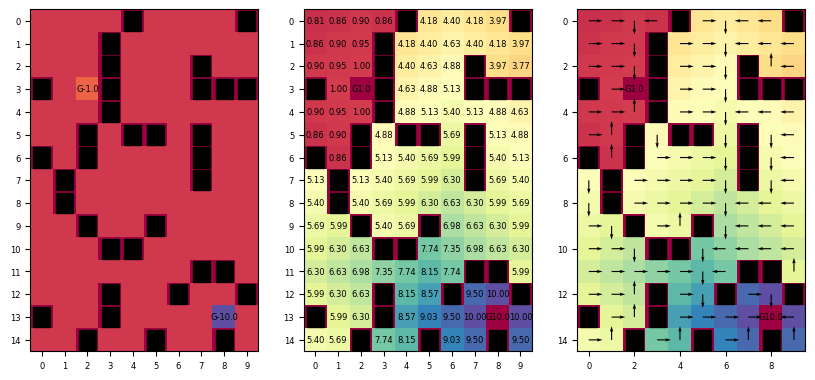

Yes, we converge w.r.t. our tolerance
Distance between V_20(S) and V_21(S) is: 0.0


In [10]:
# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

# Solve and plot
PY_GW_VI_plot.plot_world_values(World=World, Values=Values)
World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
    World = World,
    initial_values = Values,
    max_n_of_iterations = max_n_of_iterations,
    gamma = gamma,
    tolerance = tolerance,
    possible_actions = Actions,
    p = p,
    random_flag=random_flag)
PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
print( PY_GW_VI_tools.get_info_about_result(result_info = result_info) )

We can clearly see that two goal-cells have been generated and each on is associated to a certain reward. Observe that, if not forced by some wall-cells, the agent will aim to the goal-cell that carries the higher reward.

We will investigate more in detail the situation in the next paragraph.

### Tests - 2 goal-cells

Let's now play a little with the code. We will observe what happens changing the values of:
- `max_n_of_iterations` (1)
- `gamma` (2)

and we will investigate:
- an average time to fall below the tolerance (3)
- number of iterations to converge (4)

having 2 goal-cells.

#### (1) Changing `max_n_of_iterations`

max_n_of_iterations =  2


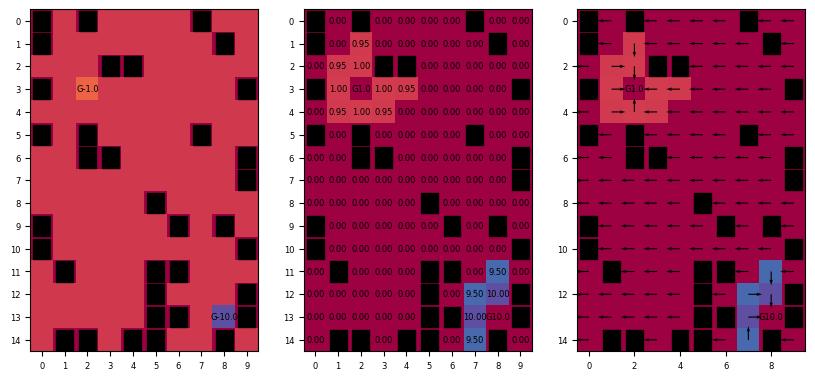

No, we stop before reaching the tolerance threshold
Distance between V_2(S) and V_3(S) is: 1.3546524769598043



max_n_of_iterations =  4


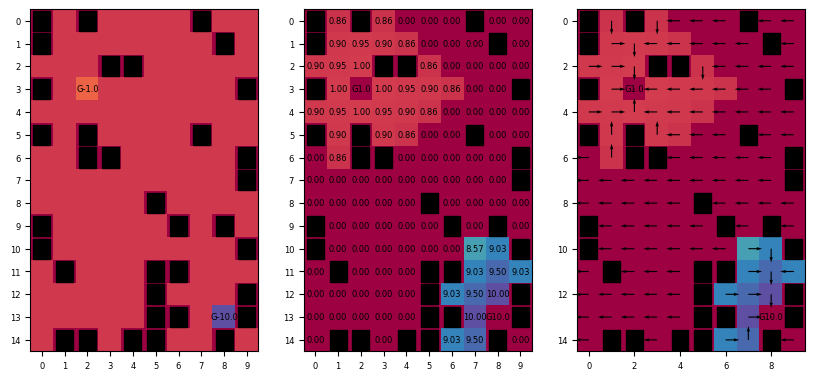

No, we stop before reaching the tolerance threshold
Distance between V_4(S) and V_5(S) is: 0.7275068118237795



max_n_of_iterations =  6


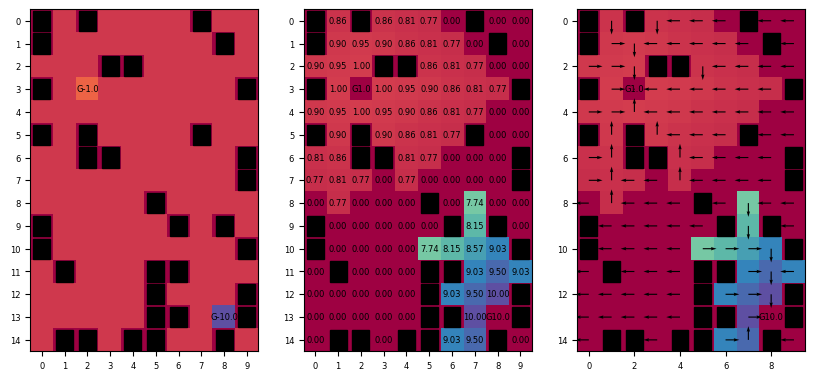

No, we stop before reaching the tolerance threshold
Distance between V_6(S) and V_7(S) is: 0.9177272440810793



max_n_of_iterations =  8


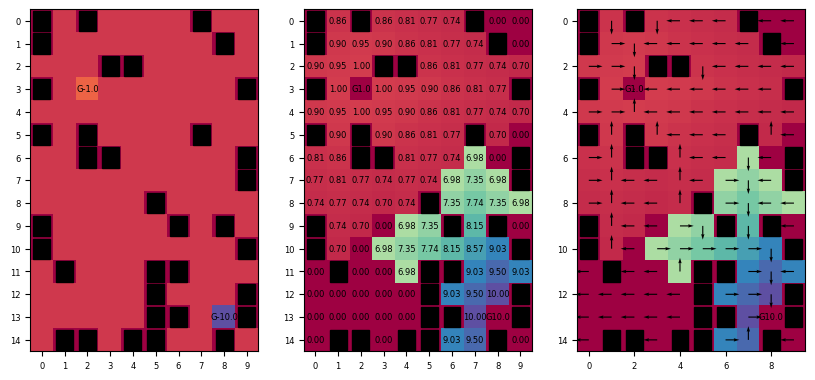

No, we stop before reaching the tolerance threshold
Distance between V_8(S) and V_9(S) is: 1.5150325304660712



max_n_of_iterations =  10


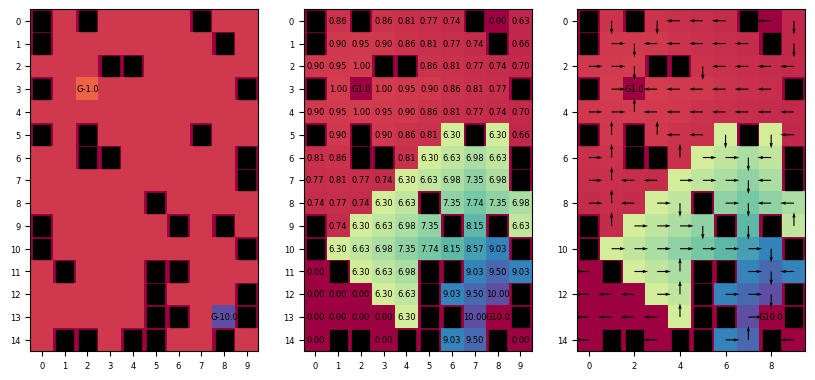

No, we stop before reaching the tolerance threshold
Distance between V_10(S) and V_11(S) is: 1.4986389631301704



max_n_of_iterations =  12


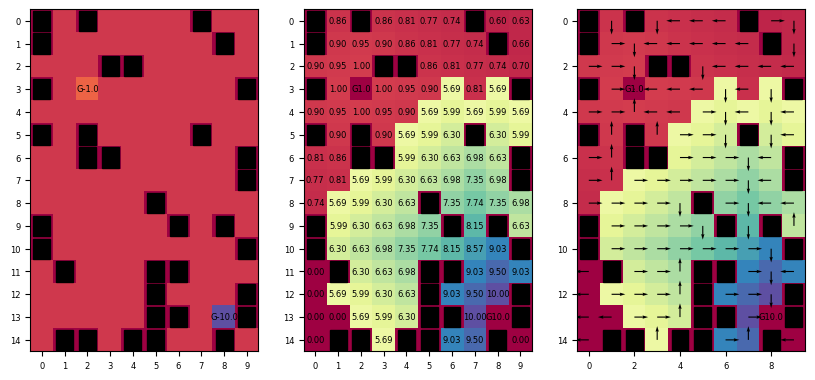

No, we stop before reaching the tolerance threshold
Distance between V_12(S) and V_13(S) is: 1.3869868523067952



max_n_of_iterations =  14


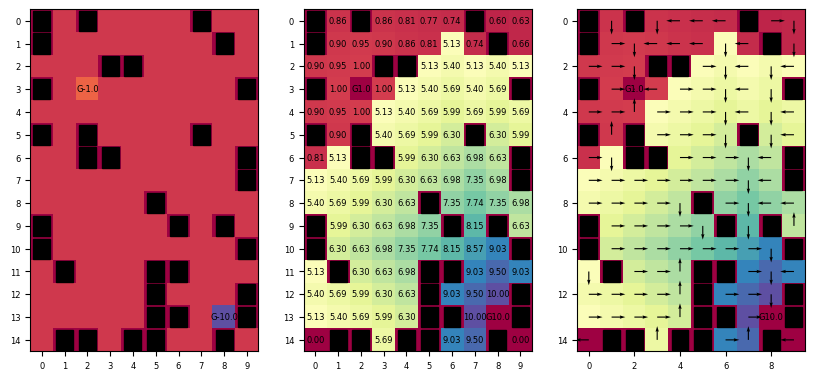

No, we stop before reaching the tolerance threshold
Distance between V_14(S) and V_15(S) is: 1.1574815205939346



max_n_of_iterations =  16


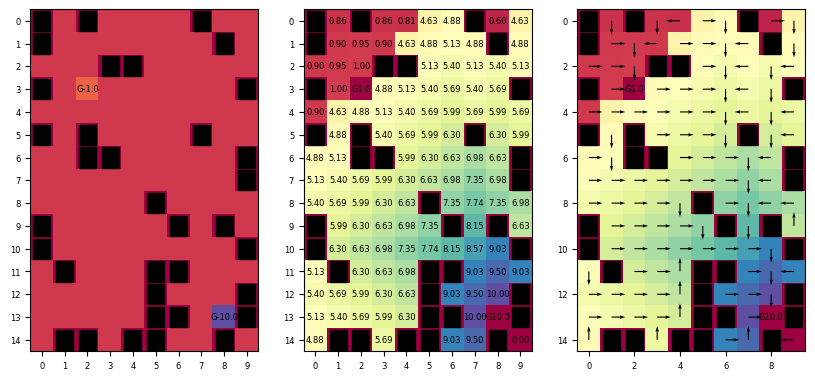

No, we stop before reaching the tolerance threshold
Distance between V_16(S) and V_17(S) is: 0.625740787911153



max_n_of_iterations =  18


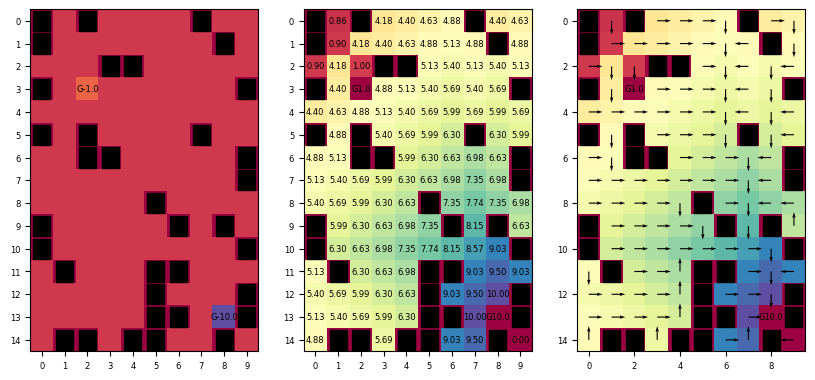

No, we stop before reaching the tolerance threshold
Distance between V_18(S) and V_19(S) is: 0.4613688699313853



max_n_of_iterations =  20


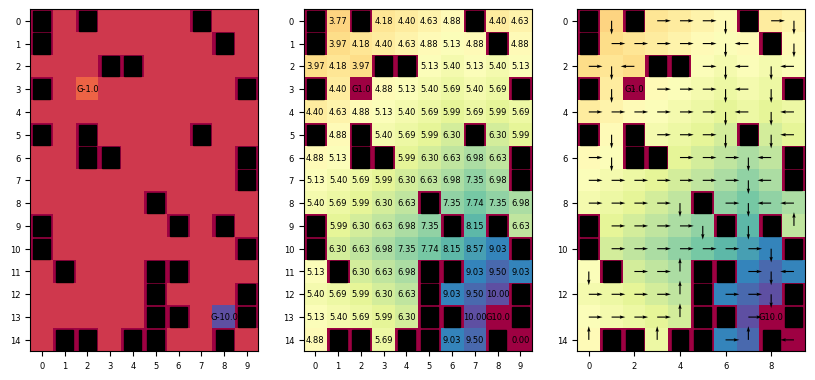

No, we stop before reaching the tolerance threshold
Distance between V_20(S) and V_21(S) is: 0.23810355066354758



max_n_of_iterations =  22


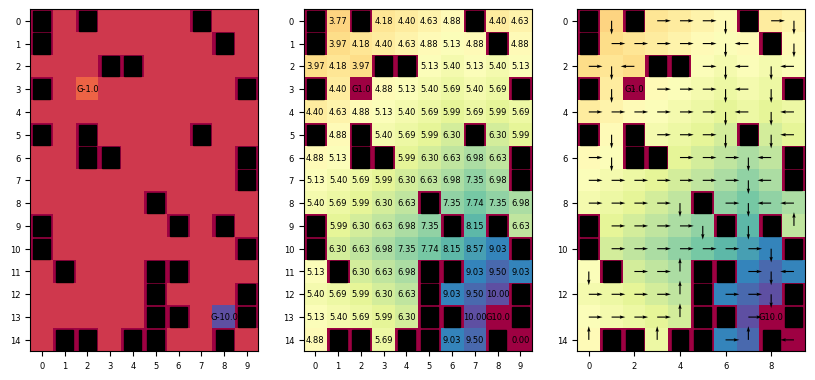

Yes, we converge w.r.t. our tolerance
Distance between V_20(S) and V_21(S) is: 0.0



max_n_of_iterations =  24


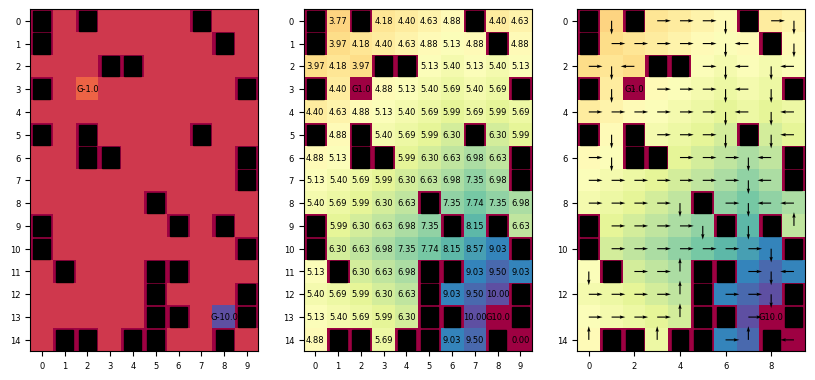

Yes, we converge w.r.t. our tolerance
Distance between V_20(S) and V_21(S) is: 0.0



max_n_of_iterations =  26


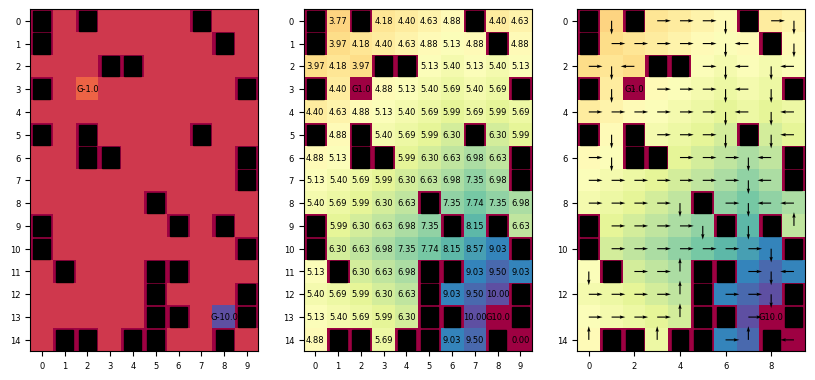

Yes, we converge w.r.t. our tolerance
Distance between V_20(S) and V_21(S) is: 0.0





In [11]:
# (1) Changing max_n_of_iterations: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 13

for n in range(1, iterations_for + 1):
    print("max_n_of_iterations = ", n*2)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = n*2,
        gamma = gamma,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

A curious thing happens in this case. Each goal-cell may be considered "as a source of heat": at each iteration the "effects of the warmth" reach a greater radius of influence. Before intersecting, it is as if in a specific state the agent knew nothing of the existence of the other sources and it will follow the path that leads to the closer goal-cell (if the "warmth" coming from it at a certain iteration had already reached that position).

When the "warmth" coming from different goal-cells starts to intersect, so in a specific cell the agent will be aware of the existance of multiple goal-cells, the agent may decide to aim for a specific goal-cell rather than anotehr one.

But how does it decide which aim to pursue? See next paragraph!

#### (2) Changing `gamma`

gamma =  0.1


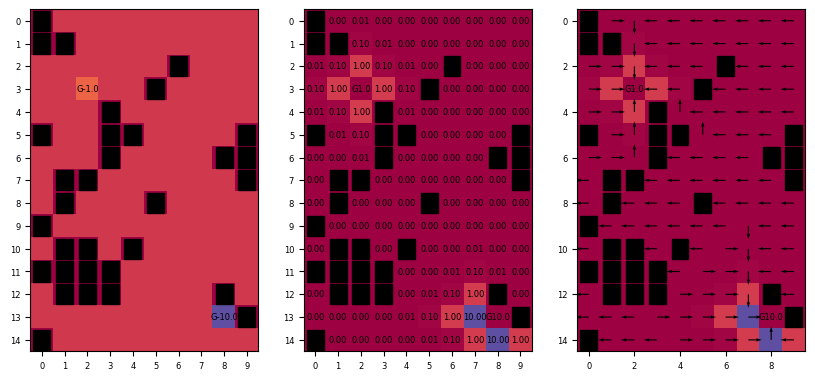

Yes, we converge w.r.t. our tolerance
Distance between V_4(S) and V_5(S) is: 0.0002316606713852541



gamma =  0.2


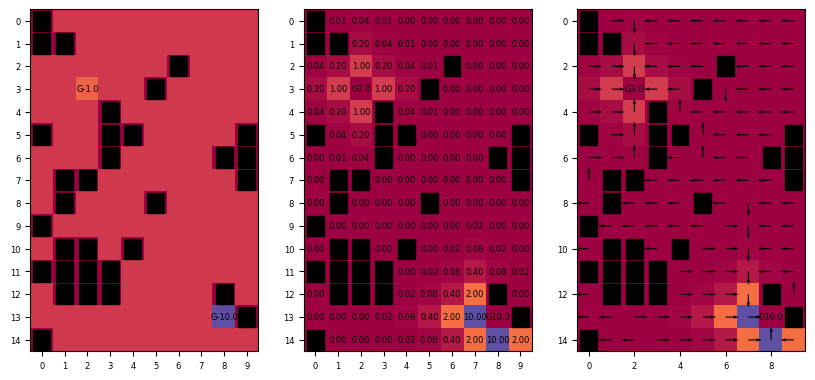

Yes, we converge w.r.t. our tolerance
Distance between V_5(S) and V_6(S) is: 0.0007868790673710078



gamma =  0.30000000000000004


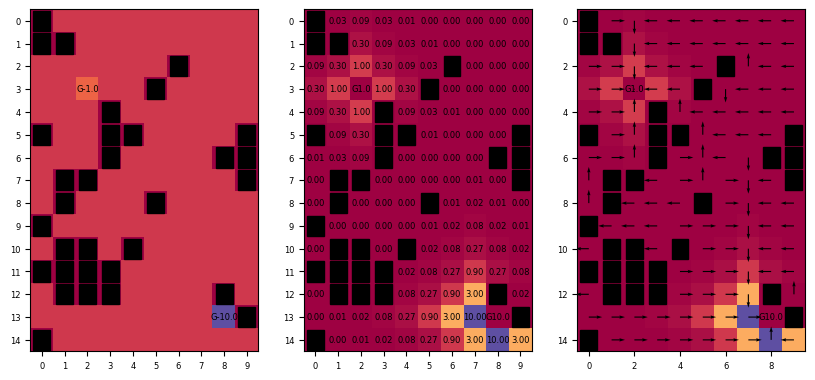

Yes, we converge w.r.t. our tolerance
Distance between V_7(S) and V_8(S) is: 0.0004748023506681495



gamma =  0.4


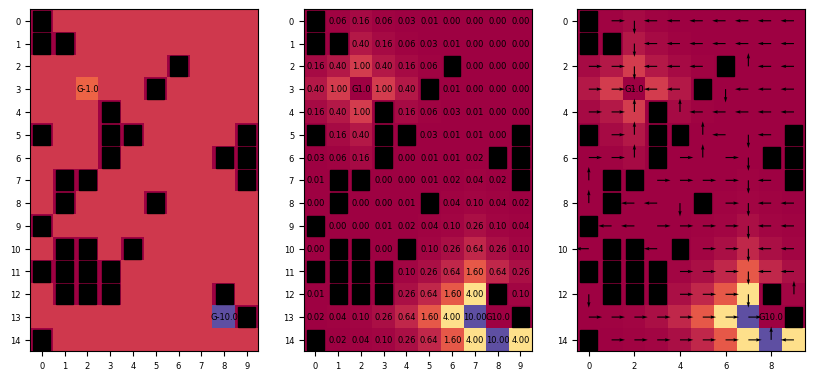

Yes, we converge w.r.t. our tolerance
Distance between V_8(S) and V_9(S) is: 0.000997048630736402



gamma =  0.5


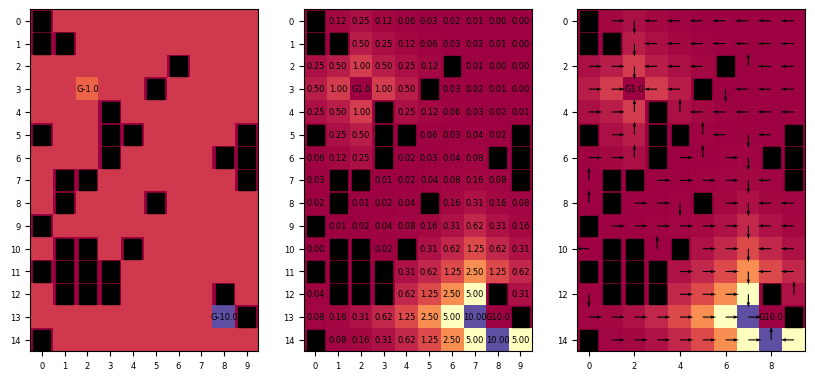

Yes, we converge w.r.t. our tolerance
Distance between V_11(S) and V_12(S) is: 0.0



gamma =  0.6000000000000001


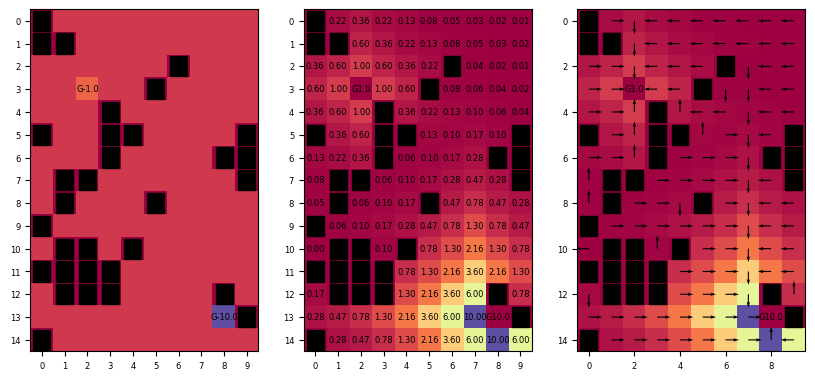

Yes, we converge w.r.t. our tolerance
Distance between V_12(S) and V_13(S) is: 0.0005740782358432419



gamma =  0.7000000000000001


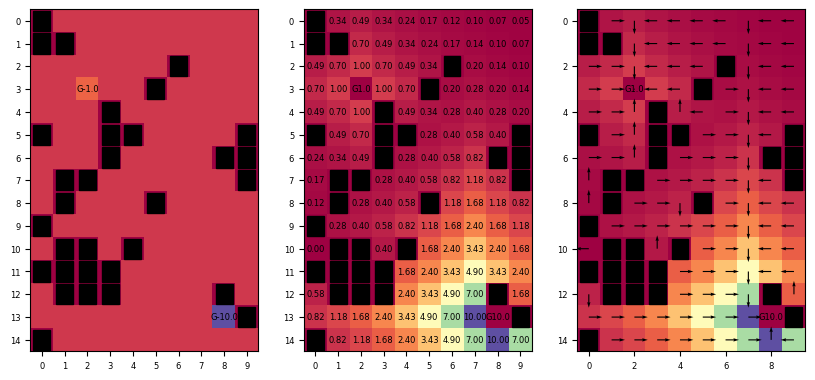

Yes, we converge w.r.t. our tolerance
Distance between V_15(S) and V_16(S) is: 0.0005815095262524183



gamma =  0.8


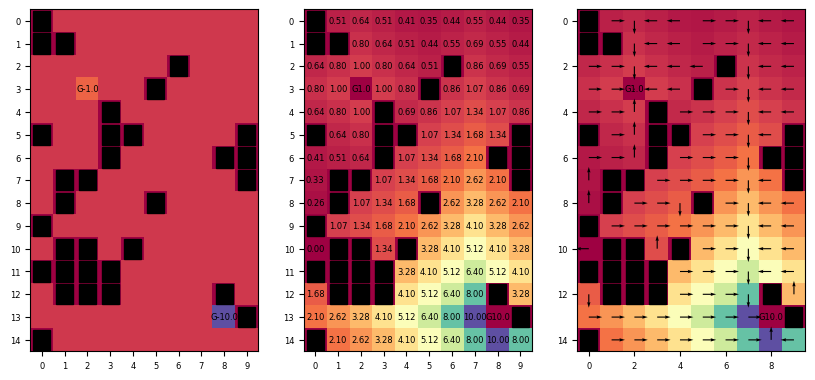

Yes, we converge w.r.t. our tolerance
Distance between V_16(S) and V_17(S) is: 0.0



gamma =  0.9


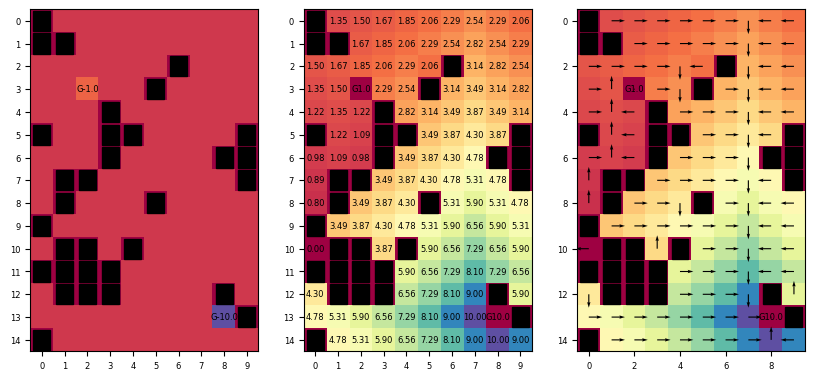

Yes, we converge w.r.t. our tolerance
Distance between V_25(S) and V_26(S) is: 0.0



gamma =  1.0


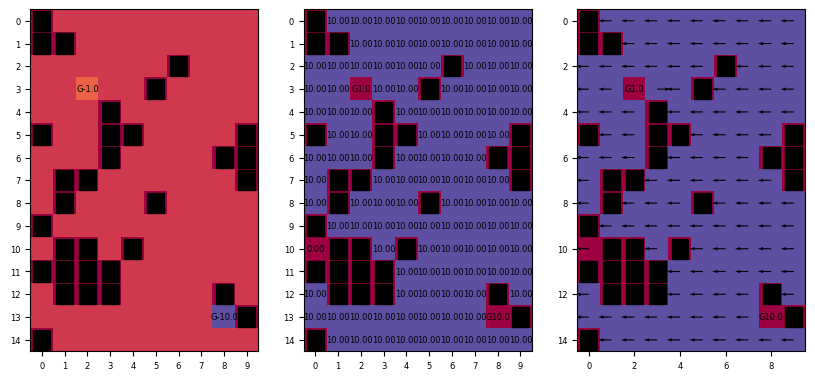

Yes, we converge w.r.t. our tolerance
Distance between V_25(S) and V_26(S) is: 0.0





In [12]:
# (2) Changing gamma: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10
max_n_of_iterations = 300

for n in range(1, iterations_for + 1):
    print("gamma = ", 0.1*n)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = max_n_of_iterations,
        gamma = 0.1*n,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

We have already mentioned in the comments of the code that the higher the value of `gamma`, the more forward-looking we are and take the future into account. [???CASO DI GAMMA CHE è 1]

In the case of multiple goals this concept has an impact on the choice of the goal-cell that the agent wants to reach. We observe that with low values of `gamma` the agent will be prone to going to the closest goal-cell while with high values of `gamma` the agent will seek for the goal-cell that will give it the highest reward.

However, consider that, reasonably, the agorithm behind this finds a compromise between the value of `gamma`, goal-cells proximity and associated rewards.

#### (3) An average time to fall below the tolerance

As already mentioned in the "Example 1" the generation of the gridworld is partially random since the amount `Nblock` is fixed but the position of the walls is not. We will now investigate an average of the time to reach the convergence as a function of `Lx` and `Ly` (the time required to do the plots will not be considered). The value of `max_n_of_iterations` is important to set a stop condition to the algorithm: we assume that the value we chose is high enough and that the convergence happens before. However, this is not sure and one may play with the variables and the code to see how many times the convergence is reached and how many times it is not. A high value of `num_tests` helps to obtain a better estimation.

In [13]:
# (3) An average time to fall below the tolerance
# we use the function function_time that has already been defined

function_time(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=15, Ly=15, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=20, Ly=20, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=25, Ly=25, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.07994762420654297 seconds
Standard deviation: 0.013234711083928364 seconds


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.12945350646972656 seconds
Standard deviation: 0.01462738226853489 seconds


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average time: 0.27606394290924074 seconds
Standard deviation: 0.024919070011810825 seconds


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average time: 0.5281900787353515 seconds
Standard deviation: 0.0406428443424016 seconds




#### (4) Number of iterations to converge

Let's study the average amount of iterations needed to get the convergence (so to fall below the requested tolerance). We assume also in this case to have a value of `max_n_of_iterations` that is high enough and will not be reached:

In [14]:
# (4) Number of iterations to converge
# we use the function function_convergence that has already been defined

function_convergence(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=15, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=20, Ly=20, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=25, Ly=25, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 22.48
Standard deviation: 3.232584105634376


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 22.56
Standard deviation: 1.3879481258317976


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 25.0
Standard deviation: 0.5291502622129182


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 30.0
Standard deviation: 0.2




### Tests - 3 goal-cells

Let's now play a little with the code. We will observe what happens changing the values of:
- `max_n_of_iterations` (1)
- `gamma` (2)

and we will investigate:
- an average time to fall below the tolerance (3)
- number of iterations to converge (4)

having 3 goal-cells.

So first of all let's set the parameters:

In [15]:
# width of the grid; height of the grid; amount of cells that are walls in the grid
Lx = 10
Ly = 15
Nblocks = 40

# cells that are goals; amount of the rewards if the goals are reached.
# Remark that here we have two goals, and the rewards_list is therefore composed by two values
goal = [(13,8),(3,2),(11, 1)]
rewards_list = [10,1,40]

# the algorithm will stop after a certain amount of iterations max_n_of_iterations if it had not reached the
# desidered tolerance yet ( dist_2(V_(k+1) - V_(k)) < tolerance )
max_n_of_iterations = 300
tolerance = 0.001

# gamma is the discount factor, which expresses how far in the future we want your sum to contribute.
# The more gamma is high, the more forward-looking we are and take the future into account
gamma = 0.95

# probability that I take the action that maximises the V (V is the value of the policy).
# A value that is less than 1 means that with a probability 1 - p we will pick a random action (however,
# in the set of the random actions there is also the one that maximises the V)
p = 1

# random_flag=False means that the choice of the action is deterministic.
# Redundancy with p = 1, but the boolean value is safer to be used with comparisons (floats may give problems)
random_flag=False

#### (1) Changing `max_n_of_iterations`

max_n_of_iterations =  2


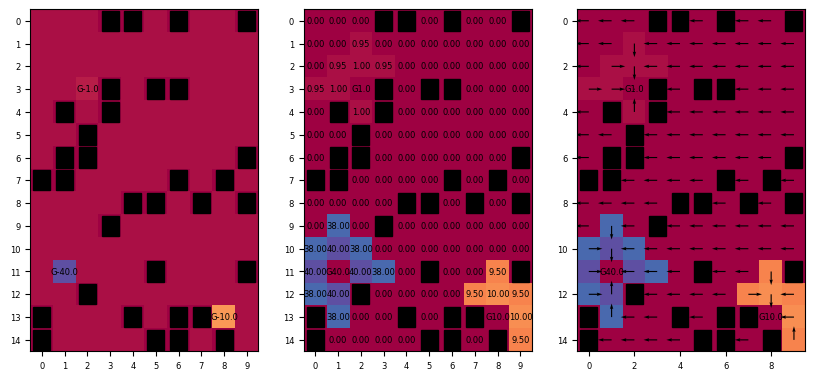

No, we stop before reaching the tolerance threshold
Distance between V_2(S) and V_3(S) is: 7.758268707213829



max_n_of_iterations =  4


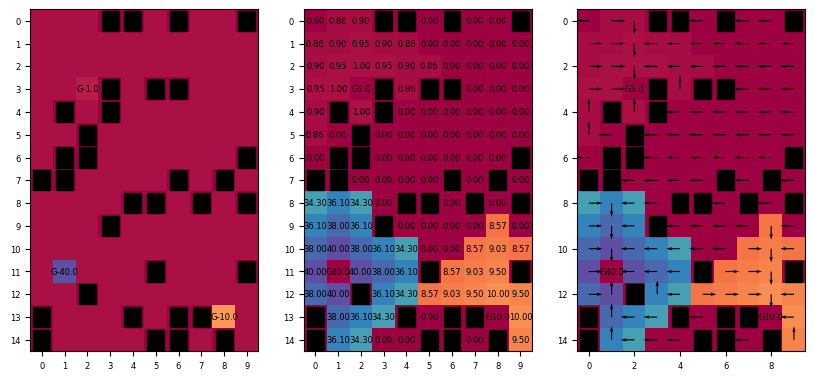

No, we stop before reaching the tolerance threshold
Distance between V_4(S) and V_5(S) is: 7.037442076330599



max_n_of_iterations =  6


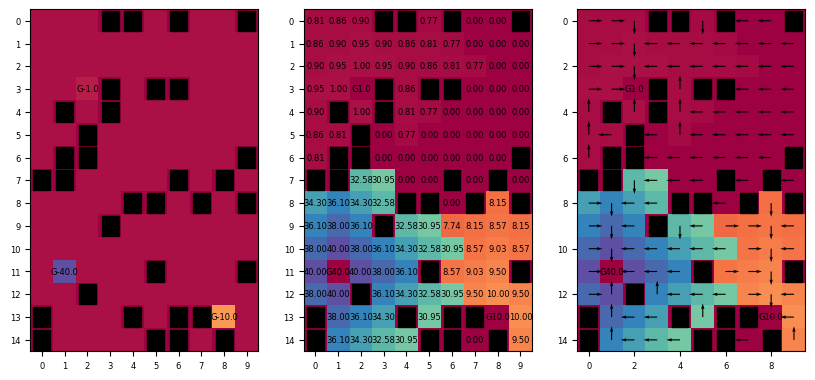

No, we stop before reaching the tolerance threshold
Distance between V_6(S) and V_7(S) is: 5.451487756647662



max_n_of_iterations =  8


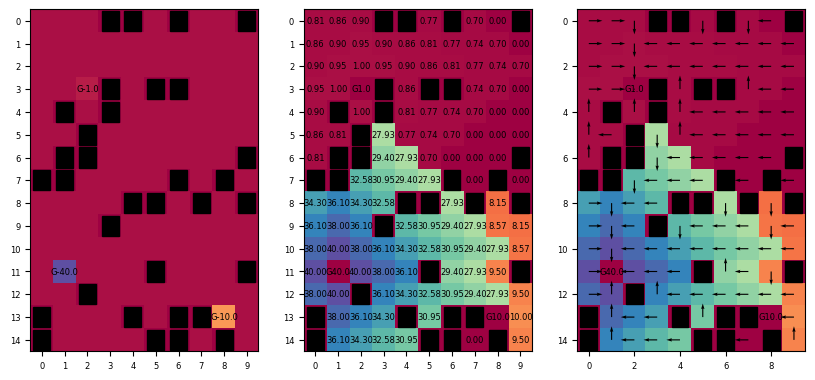

No, we stop before reaching the tolerance threshold
Distance between V_8(S) and V_9(S) is: 5.237745134056078



max_n_of_iterations =  10


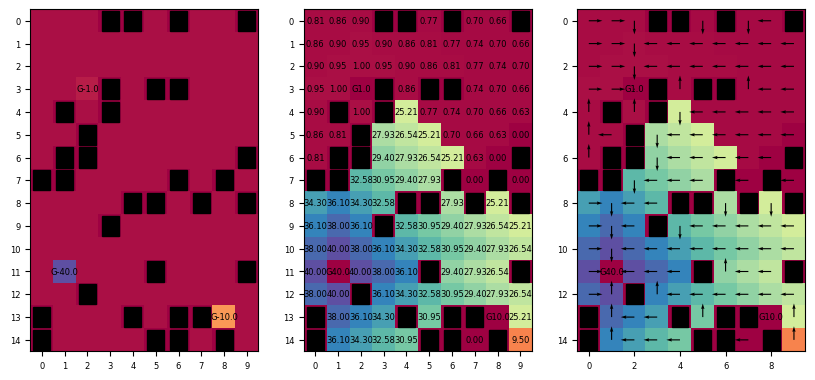

No, we stop before reaching the tolerance threshold
Distance between V_10(S) and V_11(S) is: 4.172648991292475



max_n_of_iterations =  12


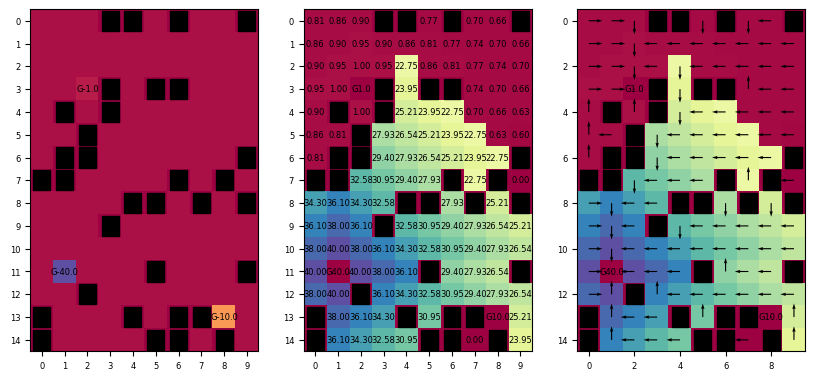

No, we stop before reaching the tolerance threshold
Distance between V_12(S) and V_13(S) is: 4.026234951541359



max_n_of_iterations =  14


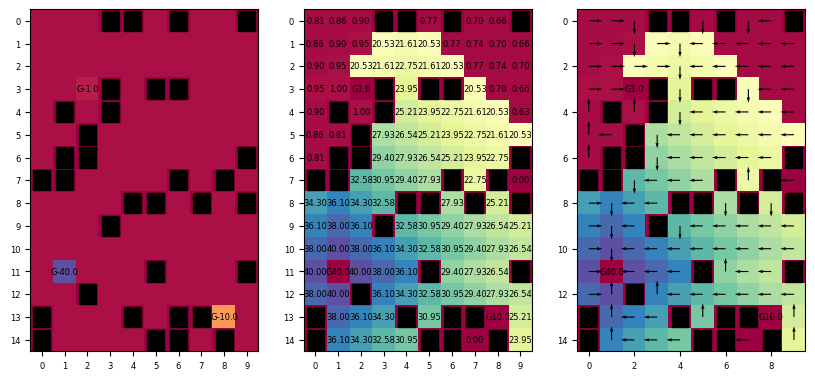

No, we stop before reaching the tolerance threshold
Distance between V_14(S) and V_15(S) is: 4.26525004454489



max_n_of_iterations =  16


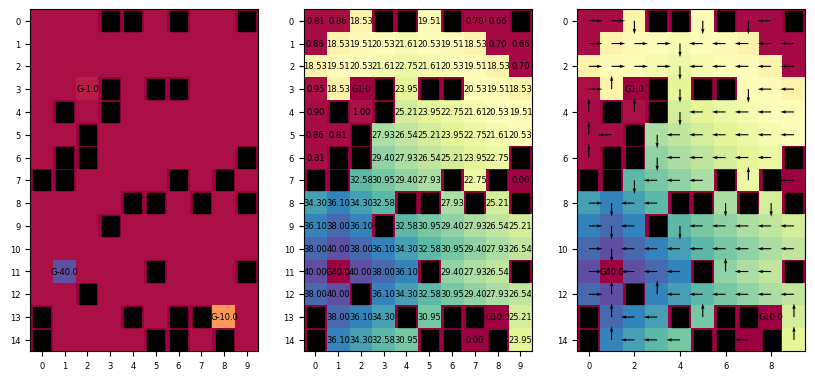

No, we stop before reaching the tolerance threshold
Distance between V_16(S) and V_17(S) is: 3.823112112110928



max_n_of_iterations =  18


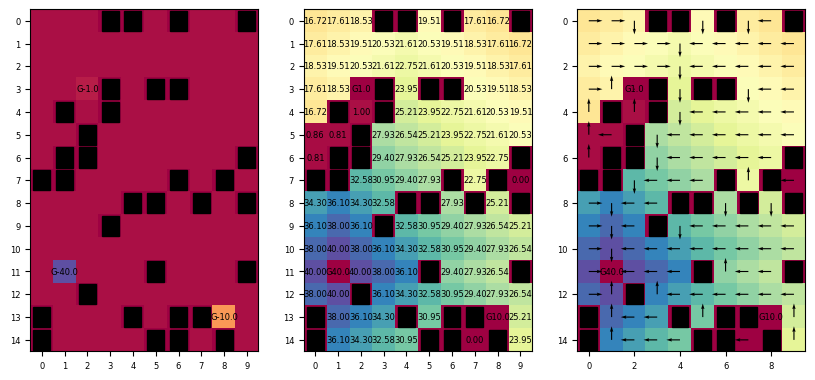

No, we stop before reaching the tolerance threshold
Distance between V_18(S) and V_19(S) is: 2.606939667177495



max_n_of_iterations =  20


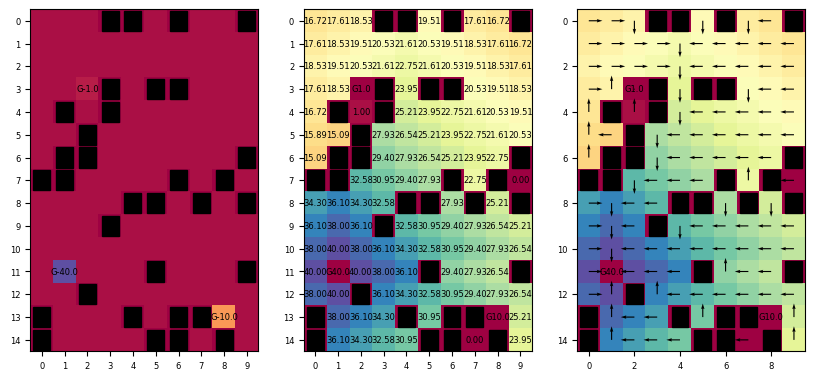

No, we stop before reaching the tolerance threshold
Distance between V_20(S) and V_21(S) is: 1.648870551488651



max_n_of_iterations =  22


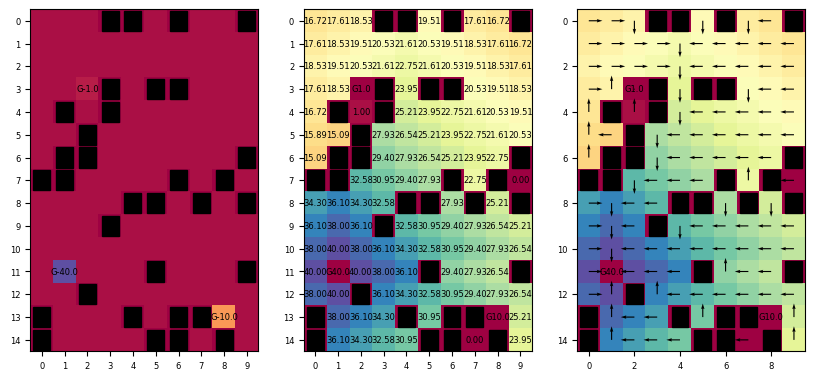

Yes, we converge w.r.t. our tolerance
Distance between V_20(S) and V_21(S) is: 0.0



max_n_of_iterations =  24


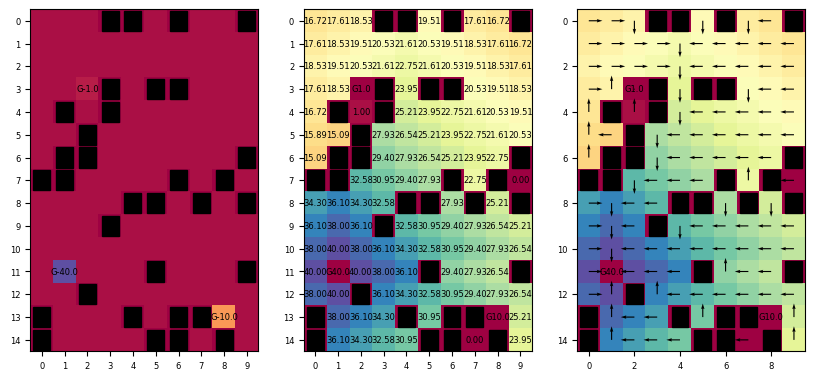

Yes, we converge w.r.t. our tolerance
Distance between V_20(S) and V_21(S) is: 0.0



max_n_of_iterations =  26


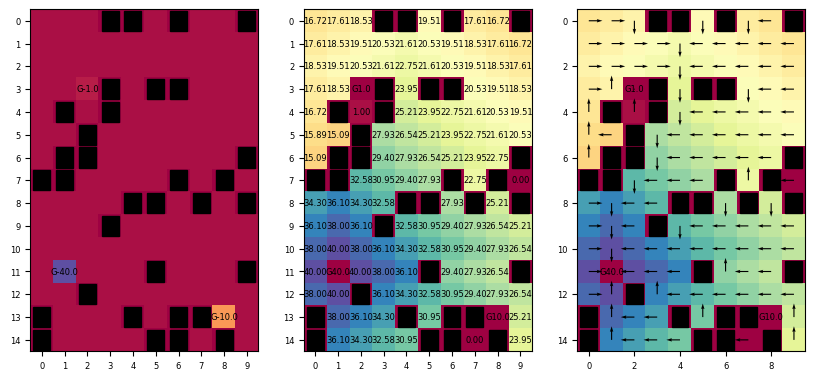

Yes, we converge w.r.t. our tolerance
Distance between V_20(S) and V_21(S) is: 0.0





In [16]:
# (1) Changing max_n_of_iterations: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 13

for n in range(1, iterations_for + 1):
    print("max_n_of_iterations = ", n*2)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = n*2,
        gamma = gamma,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

A similar situation of the case with two goal-cells happens: here we have `gamma = 0.95` and the more iterations are allowed, the more the highest reward is attractive.

#### (2) Changing `gamma`

gamma =  0.1


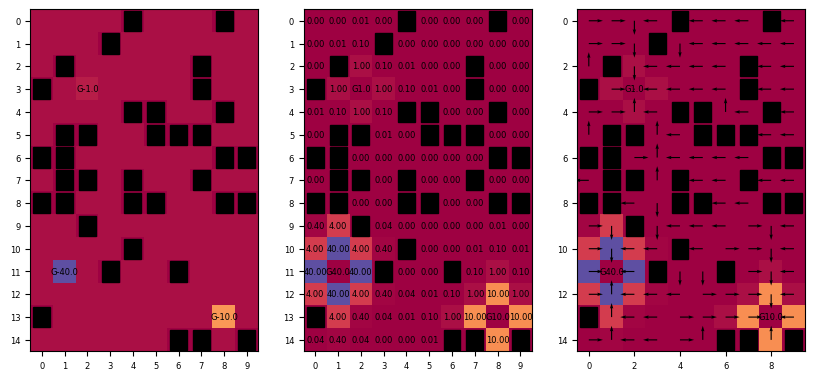

Yes, we converge w.r.t. our tolerance
Distance between V_4(S) and V_5(S) is: 0.000678626062963495



gamma =  0.2


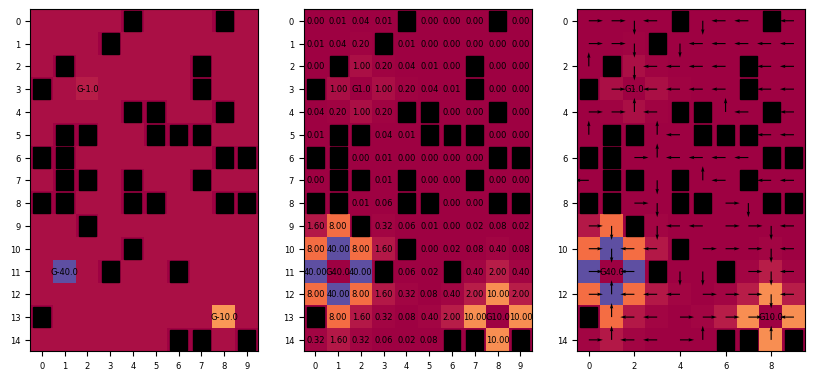

Yes, we converge w.r.t. our tolerance
Distance between V_6(S) and V_7(S) is: 5.329064958633302e-05



gamma =  0.30000000000000004


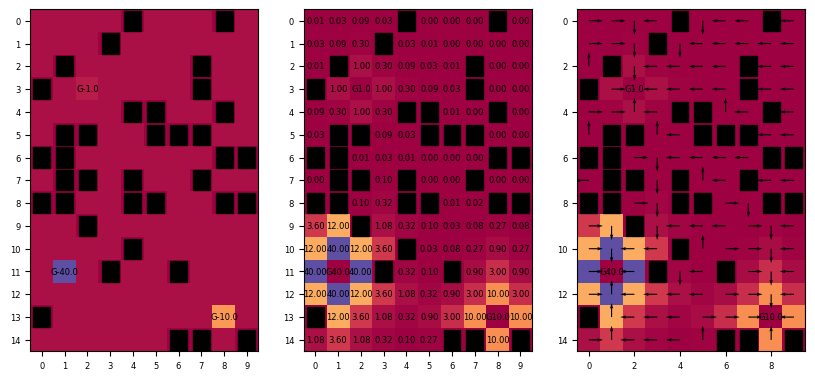

Yes, we converge w.r.t. our tolerance
Distance between V_6(S) and V_7(S) is: 0.0008452796933559931



gamma =  0.4


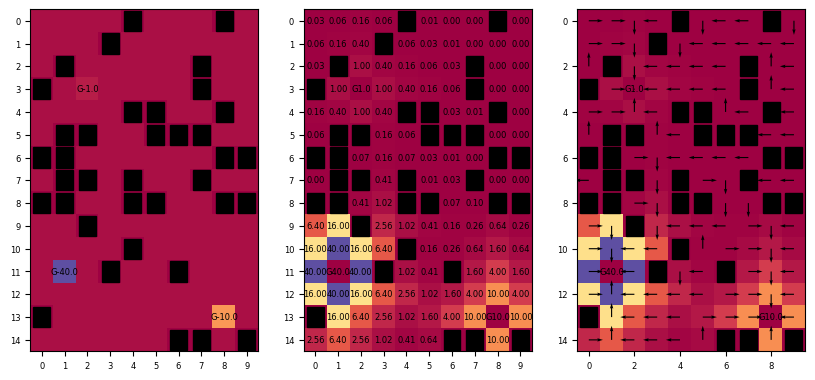

Yes, we converge w.r.t. our tolerance
Distance between V_9(S) and V_10(S) is: 0.0004625746109404625



gamma =  0.5


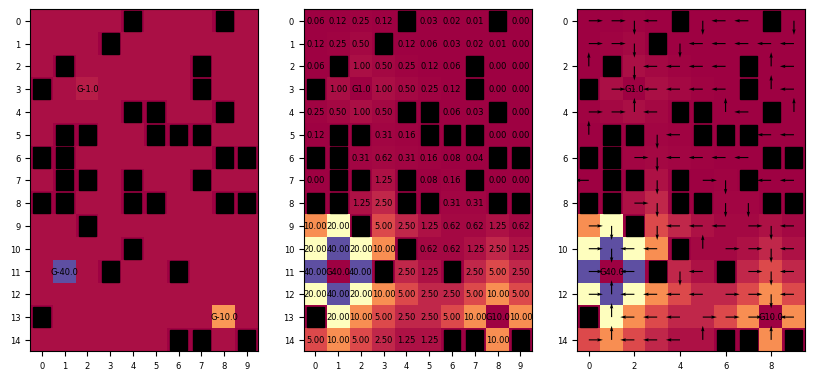

Yes, we converge w.r.t. our tolerance
Distance between V_11(S) and V_12(S) is: 3.9867997115611625e-05



gamma =  0.6000000000000001


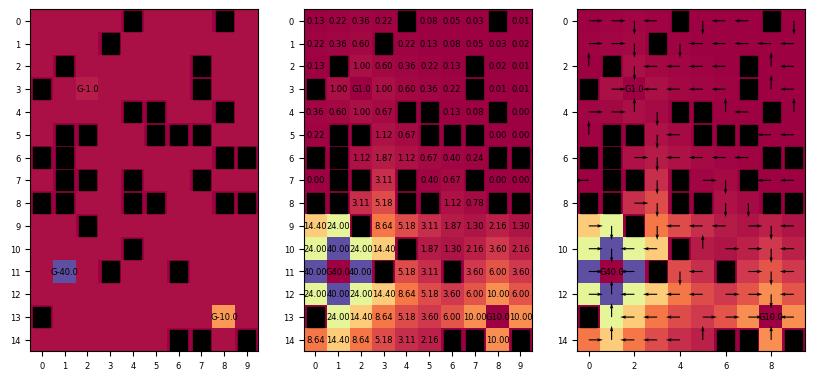

Yes, we converge w.r.t. our tolerance
Distance between V_11(S) and V_12(S) is: 0.00029622255579464524



gamma =  0.7000000000000001


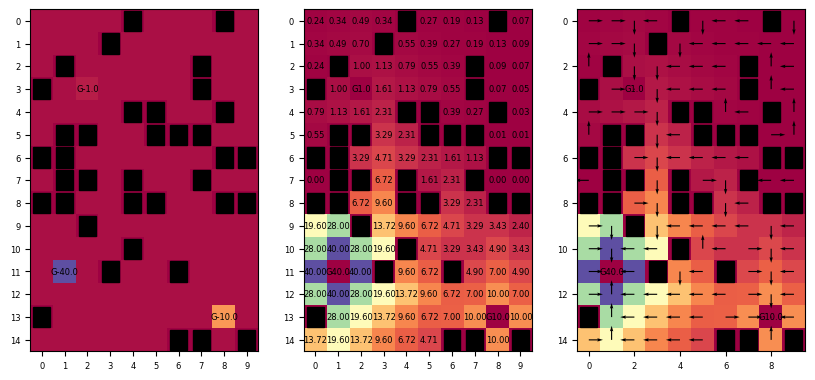

Yes, we converge w.r.t. our tolerance
Distance between V_20(S) and V_21(S) is: 0.0009915239796225391



gamma =  0.8


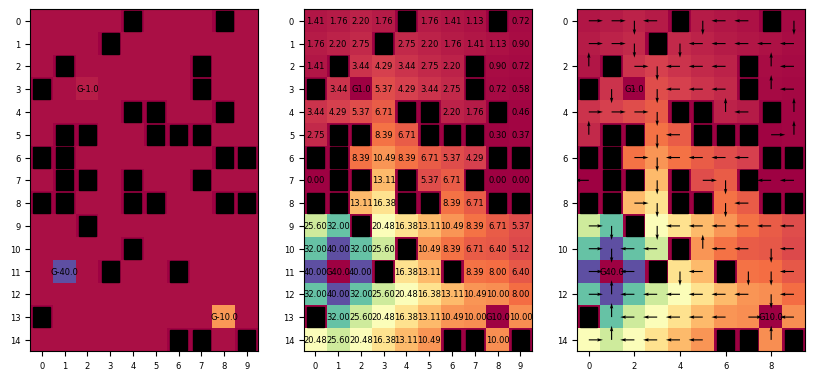

Yes, we converge w.r.t. our tolerance
Distance between V_23(S) and V_24(S) is: 0.0



gamma =  0.9


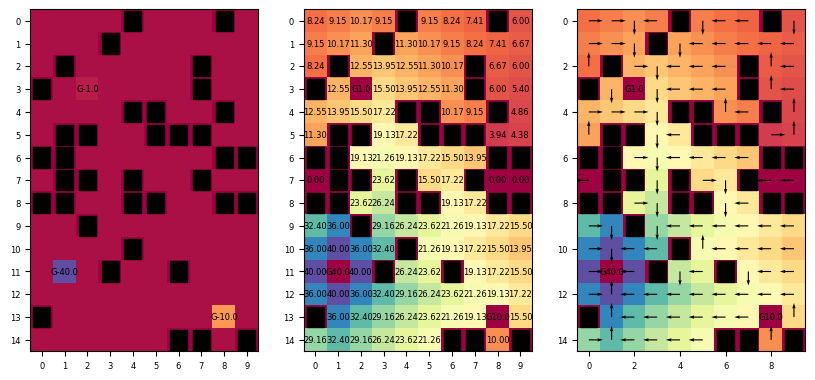

Yes, we converge w.r.t. our tolerance
Distance between V_23(S) and V_24(S) is: 0.0



gamma =  1.0


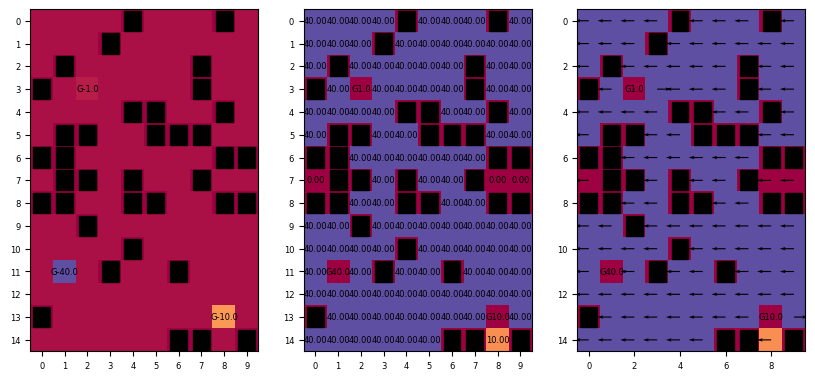

Yes, we converge w.r.t. our tolerance
Distance between V_23(S) and V_24(S) is: 0.0





In [17]:
# (2) Changing gamma: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10
max_n_of_iterations = 300

for n in range(1, iterations_for + 1):
    print("gamma = ", 0.1*n)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = max_n_of_iterations,
        gamma = 0.1*n,
        tolerance = tolerance,
        possible_actions = Actions,
        p = p,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

The same observations made for the case with two goal-cells hold.

#### (3) An average time to fall below the tolerance

Let's observe also in this case the average time required to fall below the needed tolerance (assuming the same hypotheses of the case of two goal-cells):

In [18]:
# (3) An average time to fall below the tolerance
# we use the function function_time that has already been defined

function_time(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=15, Ly=15, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=20, Ly=20, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
            p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_time(Lx=25, Ly=25, Nblocks=Nblocks, goal=goal,
              rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma,
              p=p, random_flag=random_flag, num_tests=50)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.08011497974395752 seconds
Standard deviation: 0.014308511178542137 seconds


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.14462010860443114 seconds
Standard deviation: 0.014668941474726594 seconds


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average time: 0.32207985877990725 seconds
Standard deviation: 0.024211745065589003 seconds


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average time: 0.6535314464569092 seconds
Standard deviation: 0.055630616408749 seconds




#### (4) Number of iterations to converge

Also here we assume to have a value of `max_n_of_iterations` that is high enough and will not be reached:

In [19]:
# (4) Number of iterations to converge
# we use the function function_convergence that has already been defined

function_convergence(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=15, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=20, Ly=20, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")
function_convergence(Lx=25, Ly=25, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=p, random_flag=random_flag, num_tests=50)
print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 21.16
Standard deviation: 2.685963514271927


Lx = 15; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 25.06
Standard deviation: 1.0846197490365


Lx = 20; Ly = 20
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 29.98
Standard deviation: 0.7345747068882782


Lx = 25; Ly = 25
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 36.96
Standard deviation: 0.27999999999999997




## Example 3: Gridworld problem with some random actions

Until this point we had that `p = 1` and `random_flag=False` meaning that the algorithm always takes the action that maximises the V. In this paragraph we will add a randomic flavour and will change the values of those two variables.

We will study what happens changing the values of:
-  `p` (1)

and we will investigate:
- an average time to fall below the tolerance (2)
- number of iterations to converge (3)

having one or two goal-cells.

### Tests - 1 goal-cell

First of all let's set the parameters:

In [20]:
# width of the grid; height of the grid; amount of cells that are walls in the grid
Lx = 10 
Ly = 15
Nblocks = 40

# cells that are goals; amount of the rewards if the goals are reached
goal = [(9,9)]
rewards_list = [1] 

# the algorithm will stop after a certain amount of iterations max_n_of_iterations if it had not reached the
# desidered tolerance yet ( dist_2(V_(k+1) - V_(k)) < tolerance )
max_n_of_iterations = 300
tolerance = 0.001

# gamma is the discount factor, which expresses how far in the future we want your sum to contribute.
# The more gamma is high, the more forward-looking we are and take the future into account
gamma = 0.95

# probability that I take the action that maximises the V (V is the value of the policy).
# A value that is less than 1 means that with a probability 1 - p we will pick a random action (however,
# in the set of the random actions there is also the one that maximises the V)
p = 0.1

# random_flag=False means that the choice of the action is deterministic.
# Redundancy with p = 1, but the boolean value is safer to be used with comparisons (floats may give problems)
random_flag=True

#### (1) Changing `p`

p =  0.1


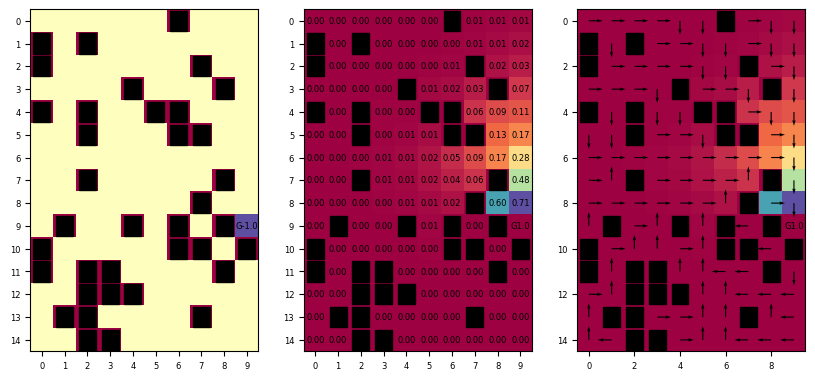

Yes, we converge w.r.t. our tolerance
Distance between V_24(S) and V_25(S) is: 0.0009749357332395192



p =  0.2


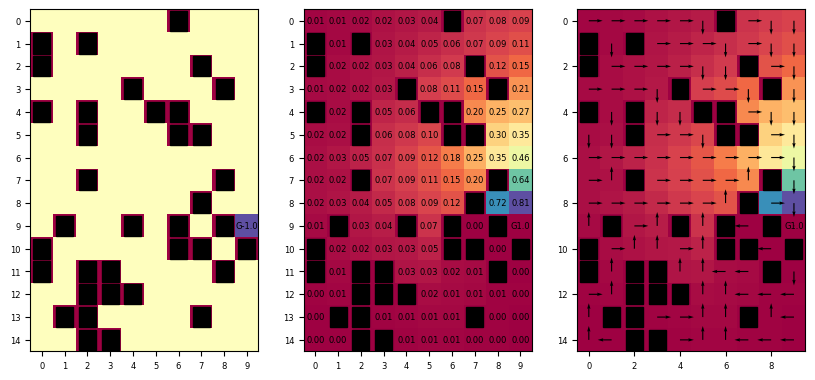

Yes, we converge w.r.t. our tolerance
Distance between V_42(S) and V_43(S) is: 0.0009582153502393491



p =  0.30000000000000004


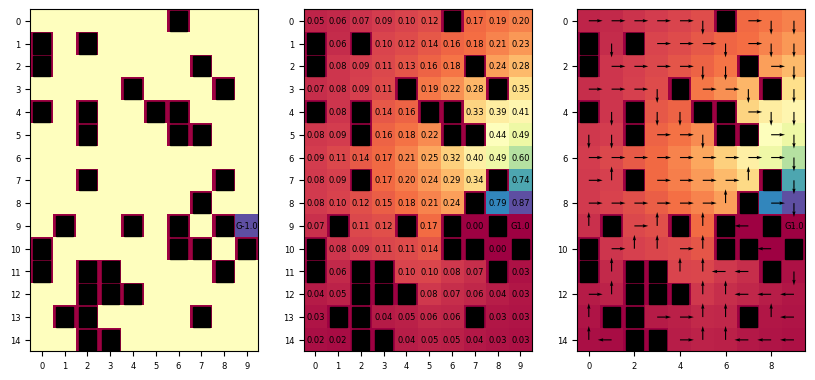

Yes, we converge w.r.t. our tolerance
Distance between V_50(S) and V_51(S) is: 0.000977090856502768



p =  0.4


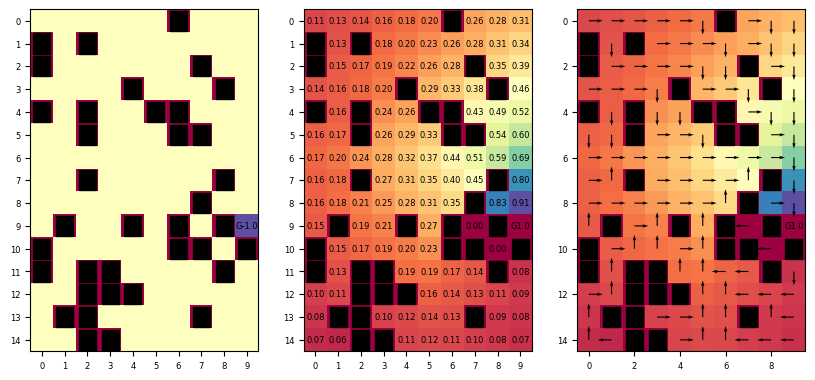

Yes, we converge w.r.t. our tolerance
Distance between V_49(S) and V_50(S) is: 0.0009794539232205475



p =  0.5


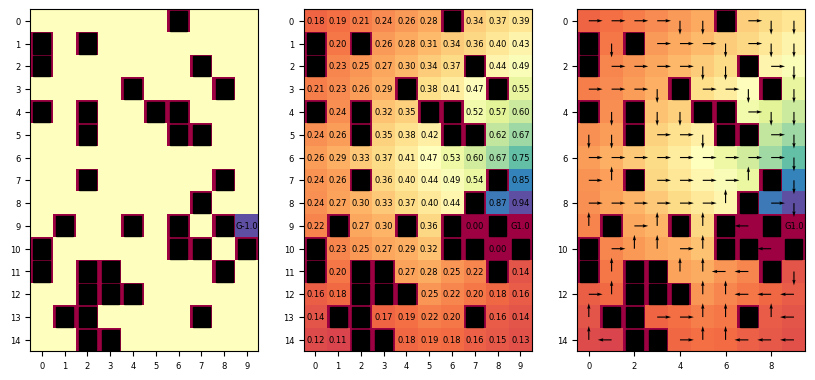

Yes, we converge w.r.t. our tolerance
Distance between V_45(S) and V_46(S) is: 0.0009179833929336932



p =  0.6000000000000001


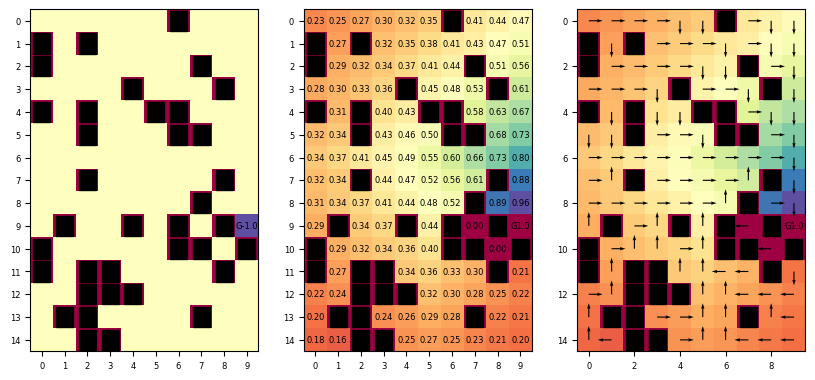

Yes, we converge w.r.t. our tolerance
Distance between V_40(S) and V_41(S) is: 0.0008665200027933185



p =  0.7000000000000001


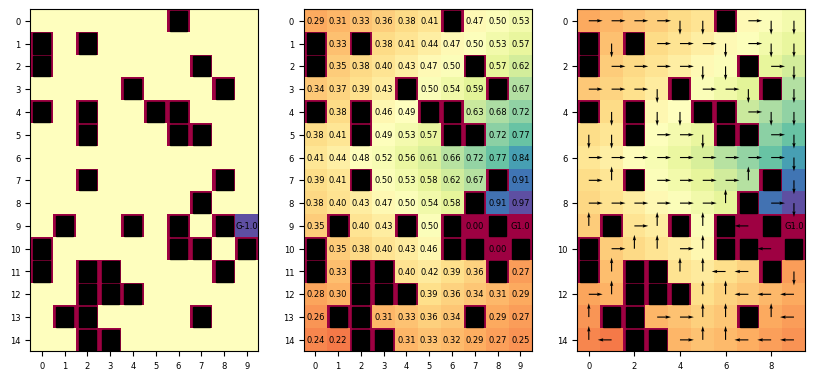

Yes, we converge w.r.t. our tolerance
Distance between V_35(S) and V_36(S) is: 0.0008519473499311458



p =  0.8


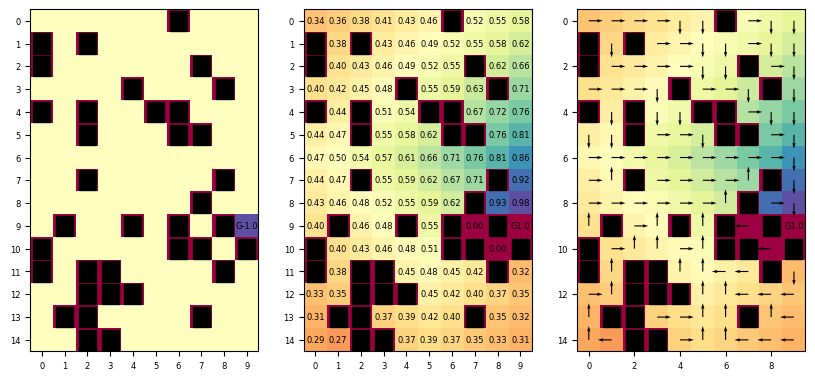

Yes, we converge w.r.t. our tolerance
Distance between V_31(S) and V_32(S) is: 0.000679907942502573



p =  0.9


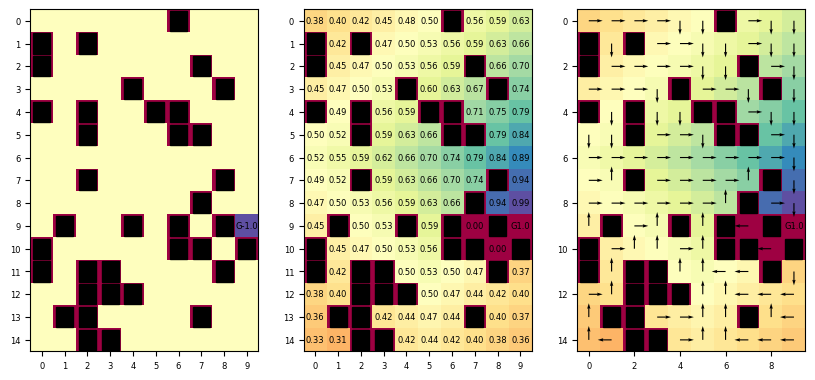

Yes, we converge w.r.t. our tolerance
Distance between V_27(S) and V_28(S) is: 0.0005450460841920565





In [21]:
# (1) Changing p: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10

for n in range(1, iterations_for):
    print("p = ", 0.1*n)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = max_n_of_iterations,
        gamma = gamma,
        tolerance = tolerance,
        possible_actions = Actions,
        p = 0.1*n,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

The direction of the arrows stays more or less the same (however, one can observe that there are some slight changes): the main thing that varies is the color of plot, i.e. [???COSA?] [???PERCHé C'è UN VALORE DI V MOLTO ALTO PER I p MEDIANI? SEMBRA UNA PARABOLA].

Observe that we are still able to reach the goal-cell in a decent amount of iterations: as a matter of fact, one needs to remember that `p` is the probability to pick the actions that maximises V and `1 - p` the probability to have a random action (where in the set of "random action" we include the optimal one). Additionally, remark that we will have this kind of situation:

- `p + (1 - p)/len(Actions)` is the total probability to pick the action A, that maximises V
- `(1 - p)/len(Actions)` is the probability to pick the action B among the other three
- `(1 - p)/len(Actions)` is the probability to pick the action C among the remaining two
- `(1 - p)/len(Actions)` is the probability to pick the last action, D

#### (2) An average time to fall below the tolerance

In this case we will keep `Lx` and `Ly` fixed, and the analysis will depend on the value of `p`:

In [22]:
# (2) An average time to fall below the tolerance
# we use the function function_time that has already been defined

for n in range(1, 11):
    print("p = ", 0.1*n)
    function_time(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=0.1*n, random_flag=random_flag, num_tests=50)
    print("\n")


p =  0.1
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.5820917081832886 seconds
Standard deviation: 0.13157331884703247 seconds


p =  0.2
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.7271976137161255 seconds
Standard deviation: 0.11427066118891423 seconds


p =  0.30000000000000004
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.8003872632980347 seconds
Standard deviation: 0.12971377355851968 seconds


p =  0.4
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.7897172069549561 seconds
Standard deviation: 0.12452962887673968 seconds


p =  0.5
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.6896581125259399 seconds
Standard deviation: 0.09550542195376543 seconds


p =  0.6000000000000001
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.6235818433761596 seconds
Standard deviation: 0.14014196186909195 seconds


p =  0.7000000000000001
Lx = 10; Ly = 15
max_

[???ANCHE QUI C'è UNA SORTA DI PARABOLA PER IL TEMPO NECESSARIO]

#### (3) Number of iterations to converge

We will keep `Lx` and `Ly` fixed, and the analysis will depend on the value of `p`:

In [23]:
# (3) Number of iterations to converge
# we use the function function_convergence that has already been defined

for n in range(1, 11):
    function_convergence(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=0.1*n, random_flag=random_flag, num_tests=50)
    print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 31.3
Standard deviation: 7.0178344238090995


Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 44.66
Standard deviation: 2.825668062600418


Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 47.14
Standard deviation: 7.662923724010309


Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 44.16
Standard deviation: 10.819168175049318


Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 41.0
Standard deviation: 7.866384175718855


Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 37.5
Standard deviation: 2.8653097563788807


Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 32.36
Standard deviation: 8.301228824698184


Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 29.2
S

### Tests - 2 goal-cells

First of all let's set the parameters:

In [24]:
# width of the grid; height of the grid; amount of cells that are walls in the grid
Lx = 10 
Ly = 15
Nblocks = 40

# cells that are goals; amount of the rewards if the goals are reached
goal = [(13,8),(3,2)]
rewards_list = [10,1]

# the algorithm will stop after a certain amount of iterations max_n_of_iterations if it had not reached the
# desidered tolerance yet ( dist_2(V_(k+1) - V_(k)) < tolerance )
max_n_of_iterations = 300
tolerance = 0.001

# gamma is the discount factor, which expresses how far in the future we want your sum to contribute.
# The more gamma is high, the more forward-looking we are and take the future into account
gamma = 0.95

# probability that I take the action that maximises the V (V is the value of the policy).
# A value that is less than 1 means that with a probability 1 - p we will pick a random action (however,
# in the set of the random actions there is also the one that maximises the V)
p = 0.1

# random_flag=False means that the choice of the action is deterministic.
# Redundancy with p = 1, but the boolean value is safer to be used with comparisons (floats may give problems)
random_flag=True

#### (1) Changing `p`

p =  0.1


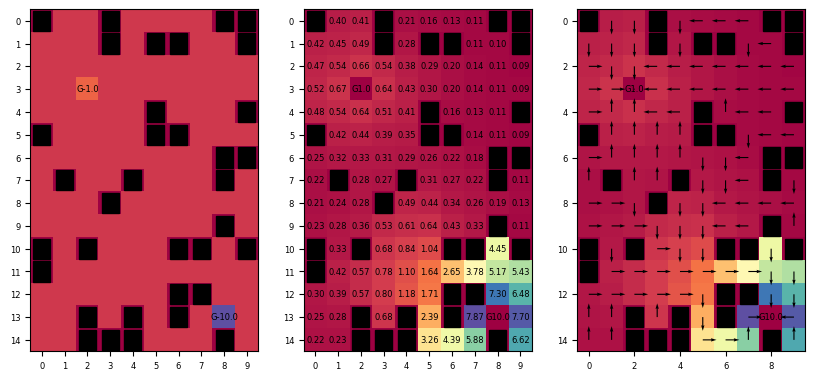

Yes, we converge w.r.t. our tolerance
Distance between V_68(S) and V_69(S) is: 0.0009596103292922915



p =  0.2


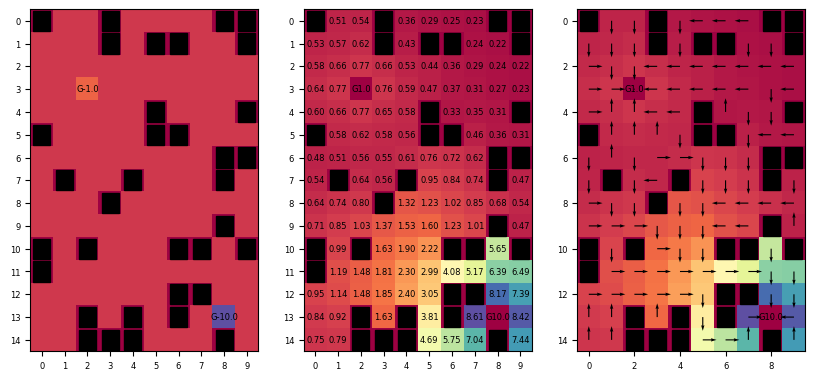

Yes, we converge w.r.t. our tolerance
Distance between V_75(S) and V_76(S) is: 0.0009396319372667143



p =  0.30000000000000004


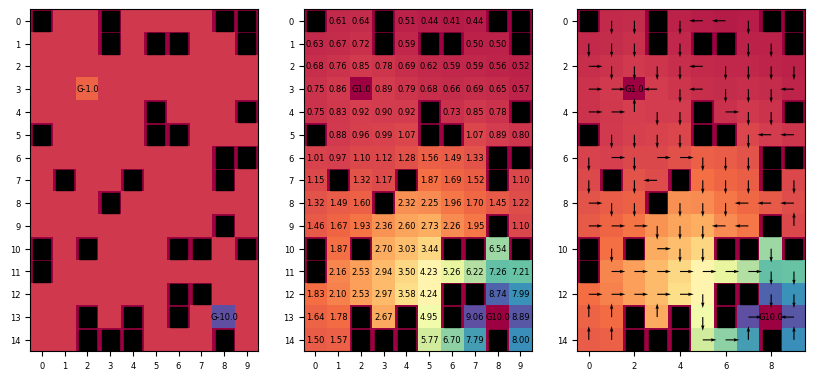

Yes, we converge w.r.t. our tolerance
Distance between V_74(S) and V_75(S) is: 0.0009908707152634323



p =  0.4


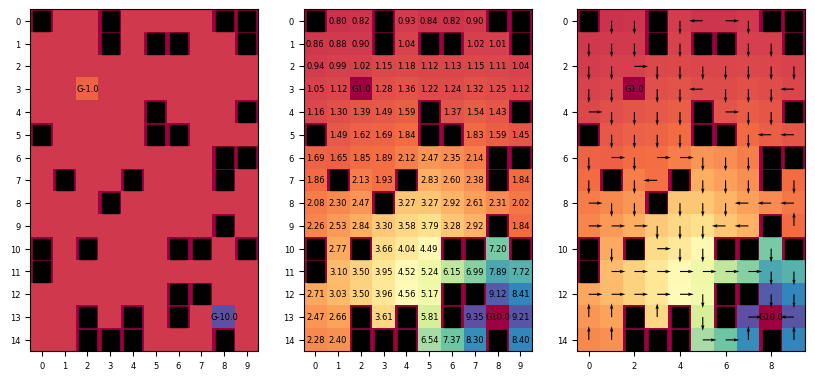

Yes, we converge w.r.t. our tolerance
Distance between V_69(S) and V_70(S) is: 0.000976773251673314



p =  0.5


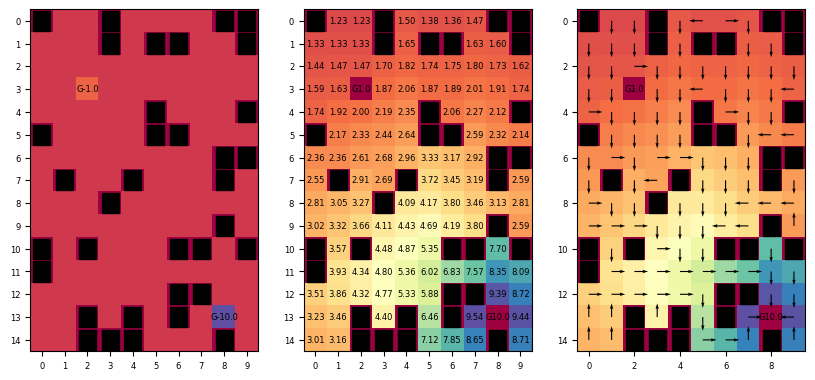

Yes, we converge w.r.t. our tolerance
Distance between V_60(S) and V_61(S) is: 0.0008734387413435547



p =  0.6000000000000001


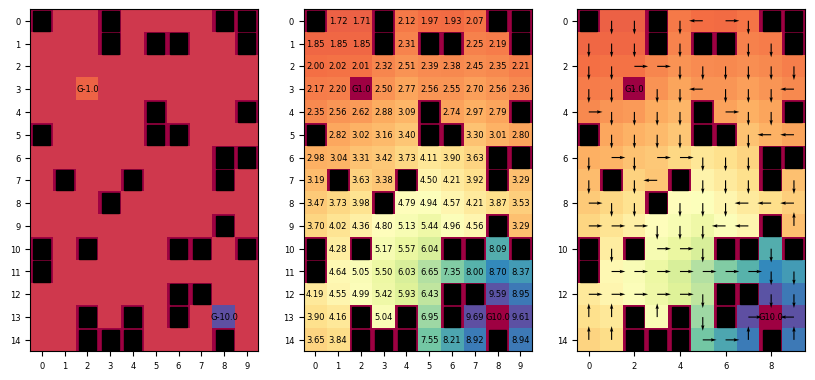

Yes, we converge w.r.t. our tolerance
Distance between V_51(S) and V_52(S) is: 0.0008923130346977469



p =  0.7000000000000001


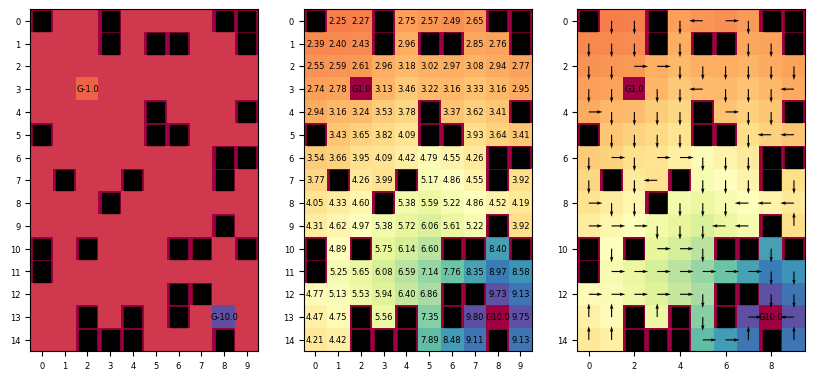

Yes, we converge w.r.t. our tolerance
Distance between V_43(S) and V_44(S) is: 0.0009059001894844278



p =  0.8


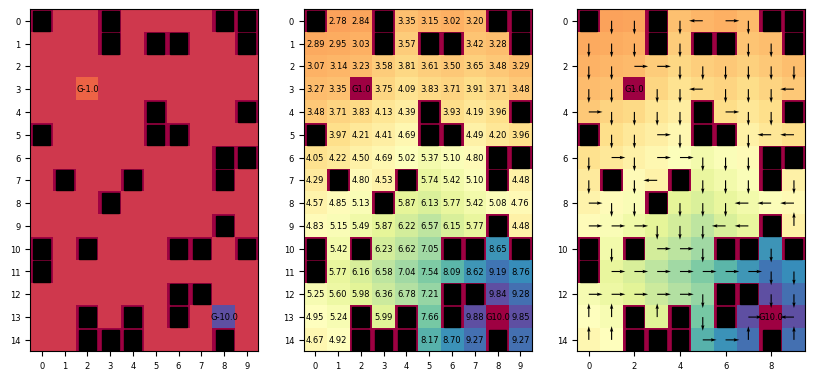

Yes, we converge w.r.t. our tolerance
Distance between V_36(S) and V_37(S) is: 0.0009045085015909468



p =  0.9


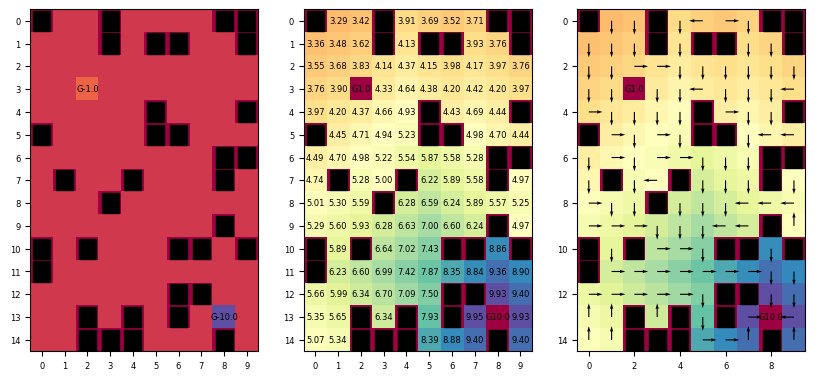

Yes, we converge w.r.t. our tolerance
Distance between V_30(S) and V_31(S) is: 0.0006596578973830474





In [25]:
# (1) Changing p: everything else, position of the Nblocks included, remains fixed


# Build the world (and initial values)
World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
Values = np.zeros((Ly,Lx))

iterations_for = 10

for n in range(1, iterations_for):
    print("p = ", 0.1*n)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = max_n_of_iterations,
        gamma = gamma,
        tolerance = tolerance,
        possible_actions = Actions,
        p = 0.1*n,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print(PY_GW_VI_tools.get_info_about_result(result_info = result_info))
    print("\n\n")

The direction of the arrows stays more or less the same (however, one can observe that there are some slight changes): the main thing that varies is the color of plot, i.e. [???COSA?] [???PERCHé C'è UN VALORE DI V MOLTO ALTO PER I p MEDIANI? SEMBRA UNA PARABOLA] [???DA RIVEDERE. è COPIA-INOCLLA DALLE COSE VISTE PRECEDENTEMENTE]

#### (2) An average time to fall below the tolerance

In this case we will keep `Lx` and `Ly` fixed, and the analysis will depend on the value of `p`:

In [26]:
# (2) An average time to fall below the tolerance
# we use the function function_time that has already been defined

for n in range(1, 11):
    print("p = ", 0.1*n)
    function_time(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=0.1*n, random_flag=random_flag, num_tests=50)
    print("\n")

p =  0.1
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 1.1505406618118286 seconds
Standard deviation: 0.15545474222493094 seconds


p =  0.2
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 1.2600853443145752 seconds
Standard deviation: 0.17134538513148465 seconds


p =  0.30000000000000004
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 1.2914926385879517 seconds
Standard deviation: 0.16116371463143236 seconds


p =  0.4
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 1.1691405248641968 seconds
Standard deviation: 0.1496143490531771 seconds


p =  0.5
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 1.0395551586151124 seconds
Standard deviation: 0.11204301533460342 seconds


p =  0.6000000000000001
Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average time: 0.9161959123611451 seconds
Standard deviation: 0.09221675376735329 seconds


p =  0.7000000000000001
Lx = 10; Ly = 15
max_n

#### (3) Number of iterations to converge

We will keep `Lx` and `Ly` fixed, and the analysis will depend on the value of `p`:

In [27]:
# (3) Number of iterations to converge
# we use the function function_convergence that has already been defined

for n in range(1, 11):
    function_convergence(Lx=10, Ly=15, Nblocks=Nblocks, goal=goal, rewards_list=rewards_list, max_n_of_iterations=1000, gamma=gamma, p=0.1*n, random_flag=random_flag, num_tests=50)
    print("\n")

Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 69.42
Standard deviation: 7.241795357506313


Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 76.1
Standard deviation: 1.9416487838947596


Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 73.82
Standard deviation: 6.0288970798977815


Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 67.18
Standard deviation: 5.240954111609832


Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 59.44
Standard deviation: 6.000533309631737


Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 51.68
Standard deviation: 6.227166289734039


Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 45.04
Standard deviation: 5.758333092136995


Lx = 10; Ly = 15
max_n_of_iterations = 1000; 50 tests
Average amount of iterations: 38.18

### Tests - Multiple goals

In this section we want to study the effect of randomicity (quantitatively indicated by the value of `p` in particular) on the path that, then, the agent will follow. We will assume that there are no wall-cells:

In [28]:
# width of the grid; height of the grid; amount of cells that are walls in the grid
Lx = 10 
Ly = 15
Nblocks = 0

# cells that are goals; amount of the rewards if the goals are reached
goal = [(3,3),(4,3),(5,3),(13,8),(10,5)]
rewards_list = [-10, -10, -10, 10,-50]

# the algorithm will stop after a certain amount of iterations max_n_of_iterations if it had not reached the
# desidered tolerance yet ( dist_2(V_(k+1) - V_(k)) < tolerance )
max_n_of_iterations = 300
tolerance = 0.001

# gamma is the discount factor, which expresses how far in the future we want your sum to contribute.
# The more gamma is high, the more forward-looking we are and take the future into account
gamma = 0.95

# probability that I take the action that maximises the V (V is the value of the policy).
# A value that is less than 1 means that with a probability 1 - p we will pick a random action (however,
# in the set of the random actions there is also the one that maximises the V)
p = 0.1

# random_flag=False means that the choice of the action is deterministic.
# Redundancy with p = 1, but the boolean value is safer to be used with comparisons (floats may give problems)
random_flag=True

p =  0.1


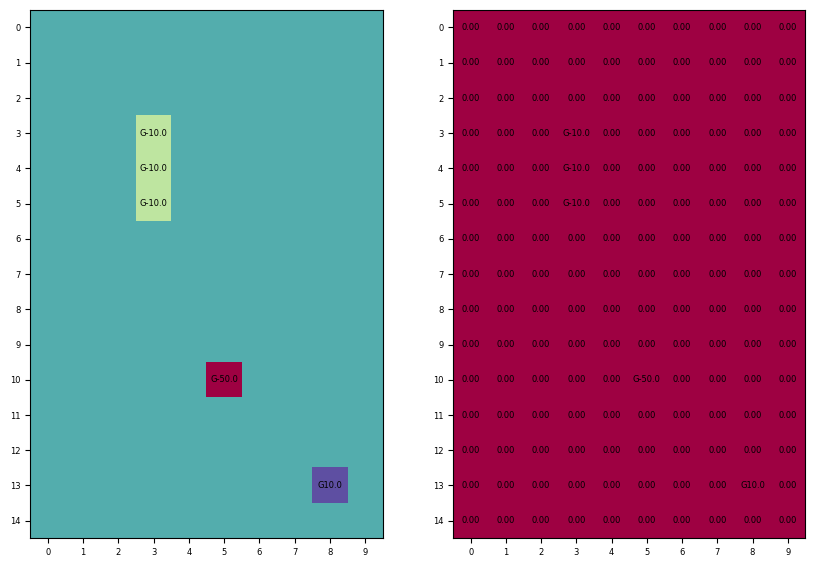

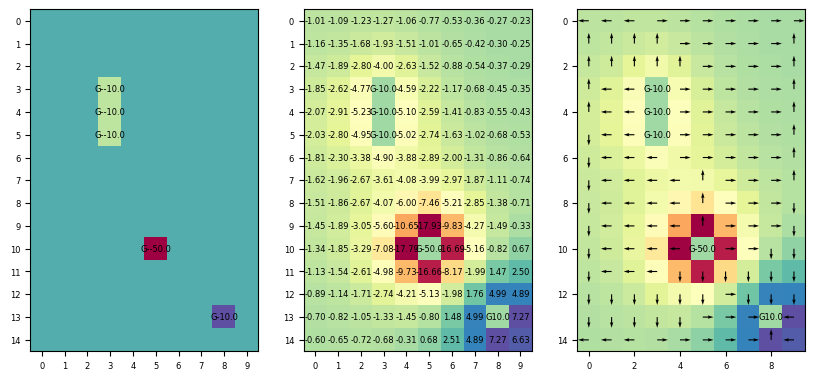

Yes, we converge w.r.t. our tolerance
Distance between V_71(S) and V_72(S) is: 0.0009456024150888648



p =  0.2


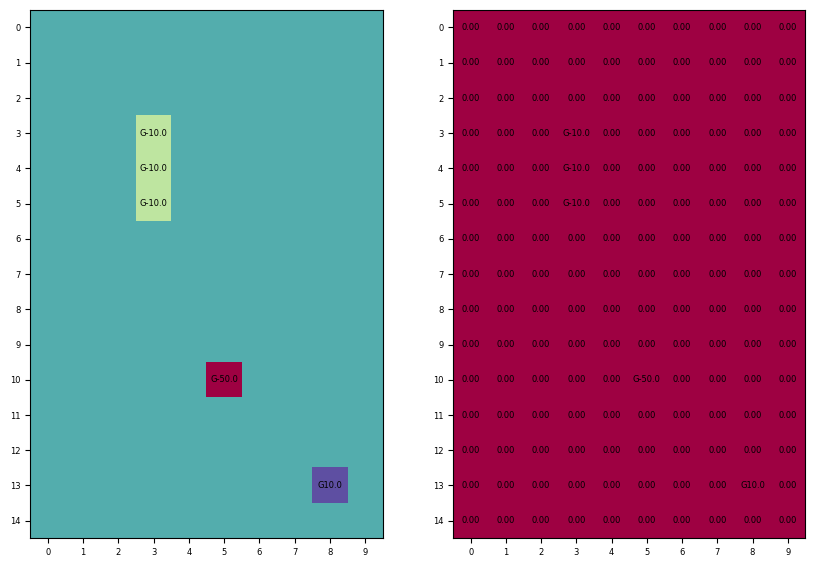

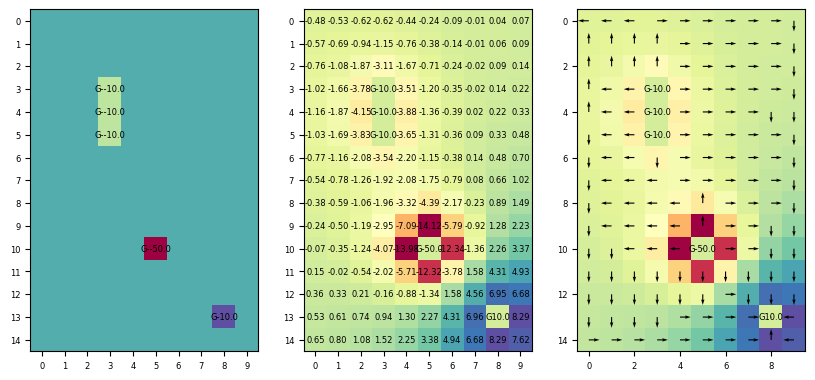

Yes, we converge w.r.t. our tolerance
Distance between V_64(S) and V_65(S) is: 0.0009778127331673294



p =  0.30000000000000004


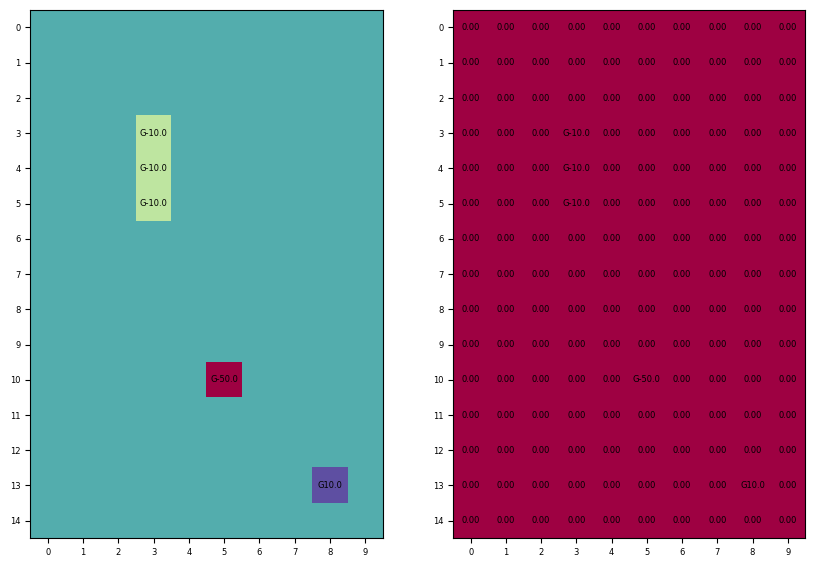

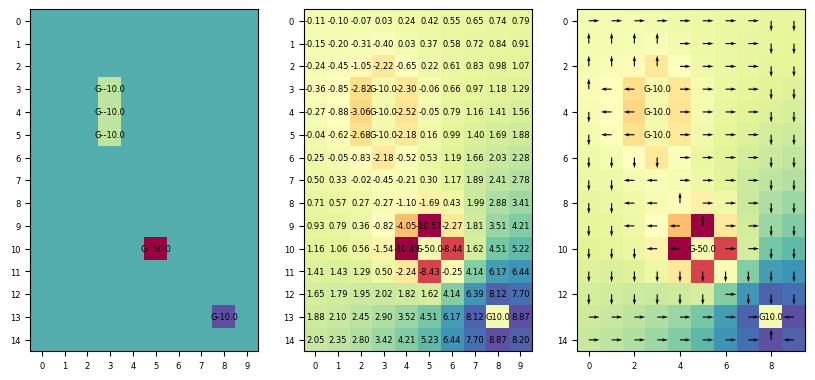

Yes, we converge w.r.t. our tolerance
Distance between V_74(S) and V_75(S) is: 0.00097539353822782



p =  0.4


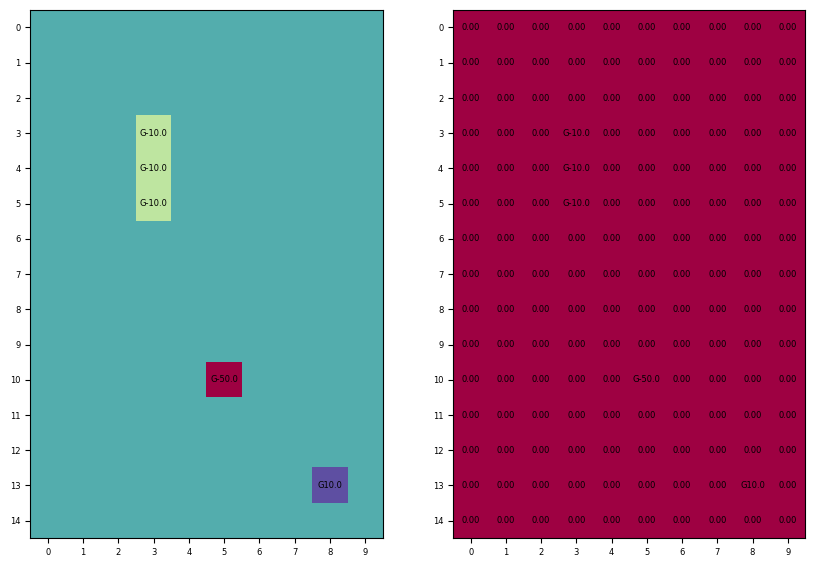

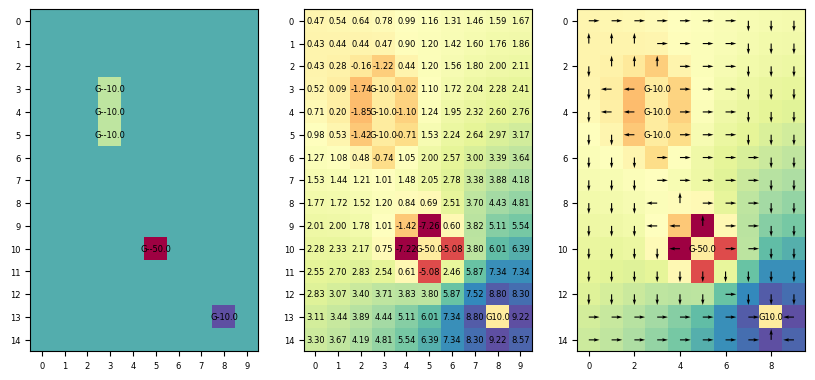

Yes, we converge w.r.t. our tolerance
Distance between V_68(S) and V_69(S) is: 0.000982577899513933



p =  0.5


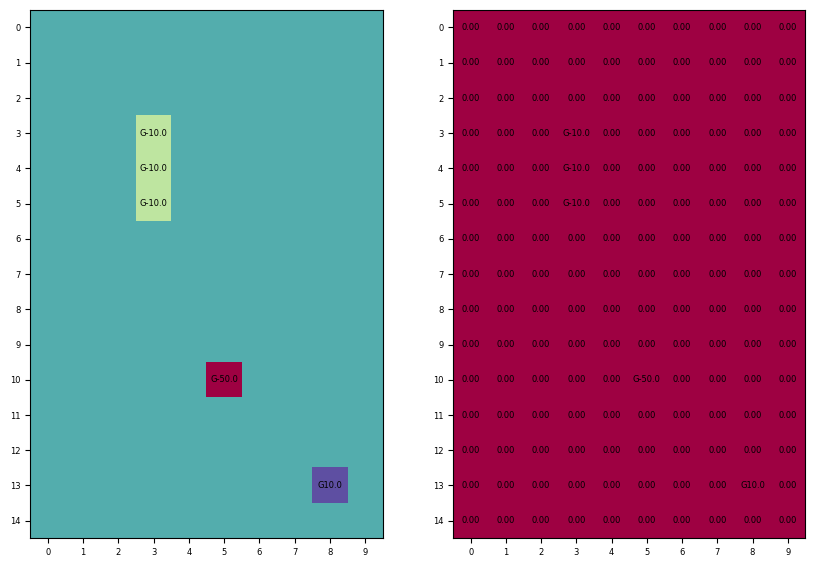

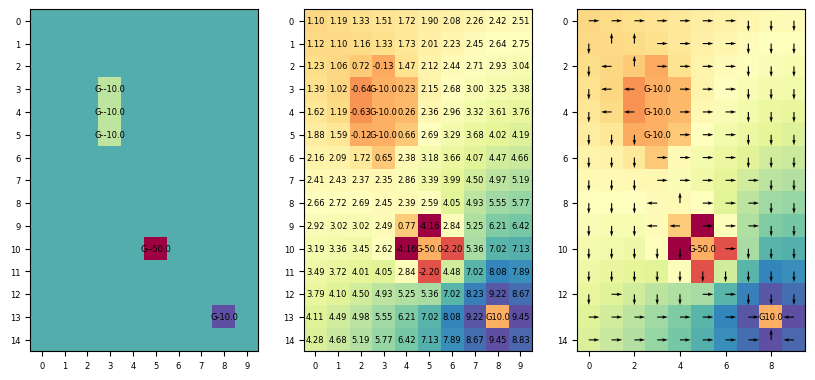

Yes, we converge w.r.t. our tolerance
Distance between V_59(S) and V_60(S) is: 0.0009321327372984594



p =  0.6000000000000001


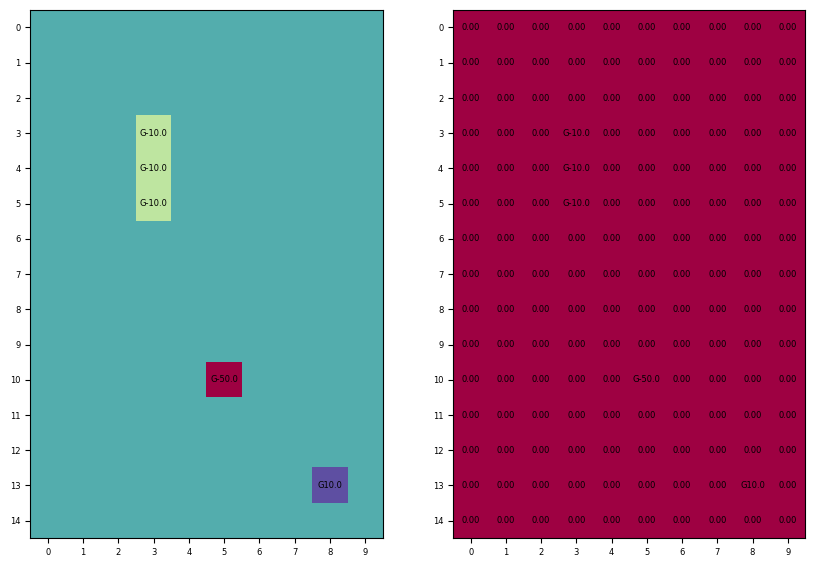

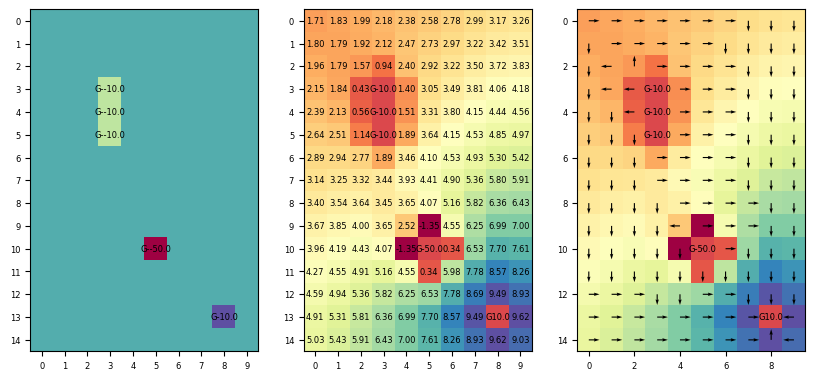

Yes, we converge w.r.t. our tolerance
Distance between V_50(S) and V_51(S) is: 0.0009083845710093224



p =  0.7000000000000001


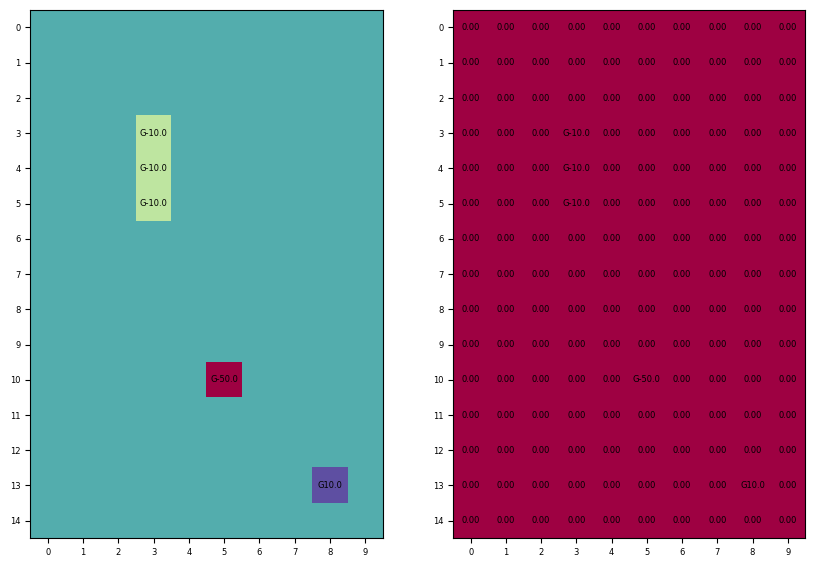

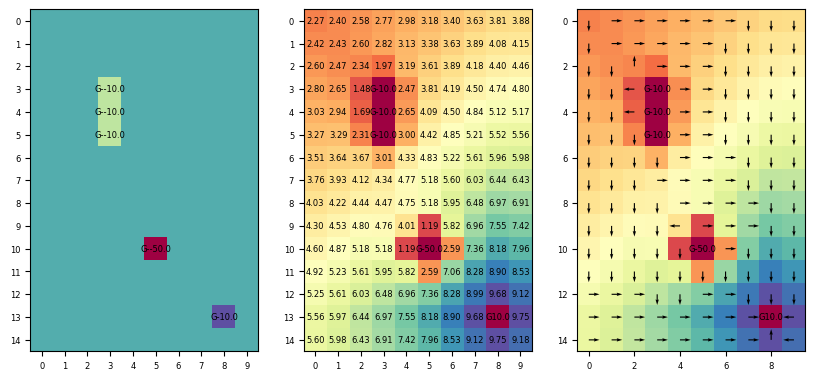

Yes, we converge w.r.t. our tolerance
Distance between V_42(S) and V_43(S) is: 0.0009561375552227695



p =  0.8


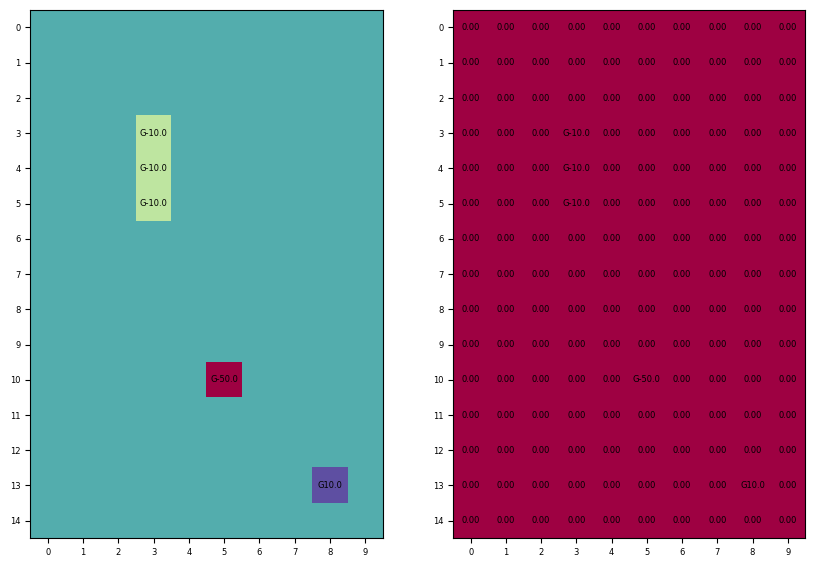

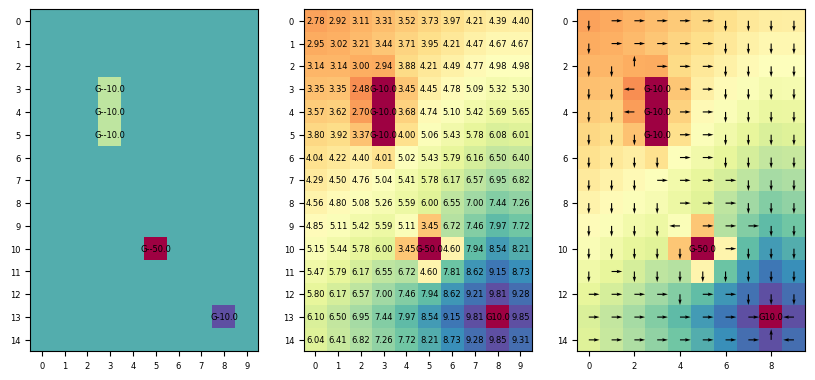

Yes, we converge w.r.t. our tolerance
Distance between V_36(S) and V_37(S) is: 0.0007863518805848697



p =  0.9


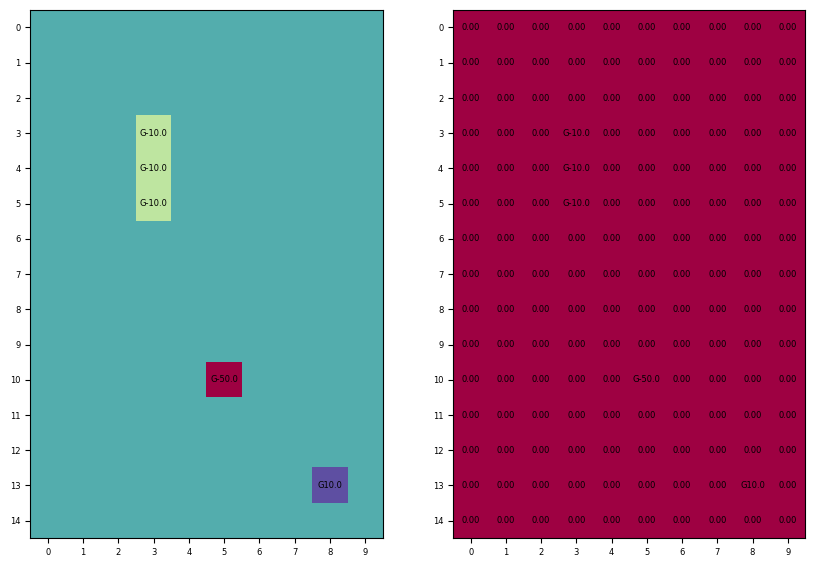

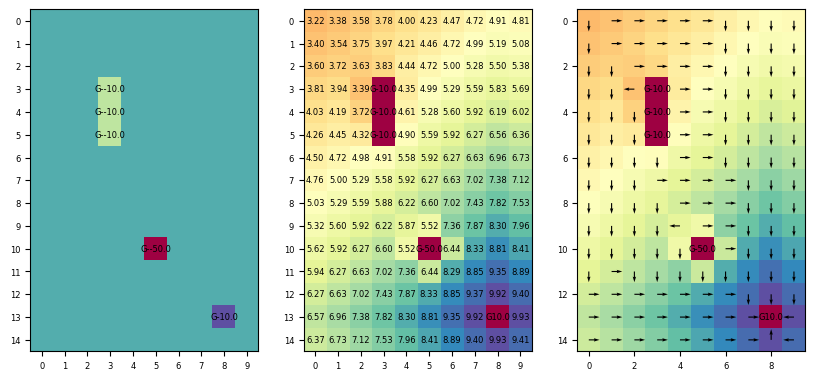

Yes, we converge w.r.t. our tolerance
Distance between V_30(S) and V_31(S) is: 0.000685538945736663



p =  1.0


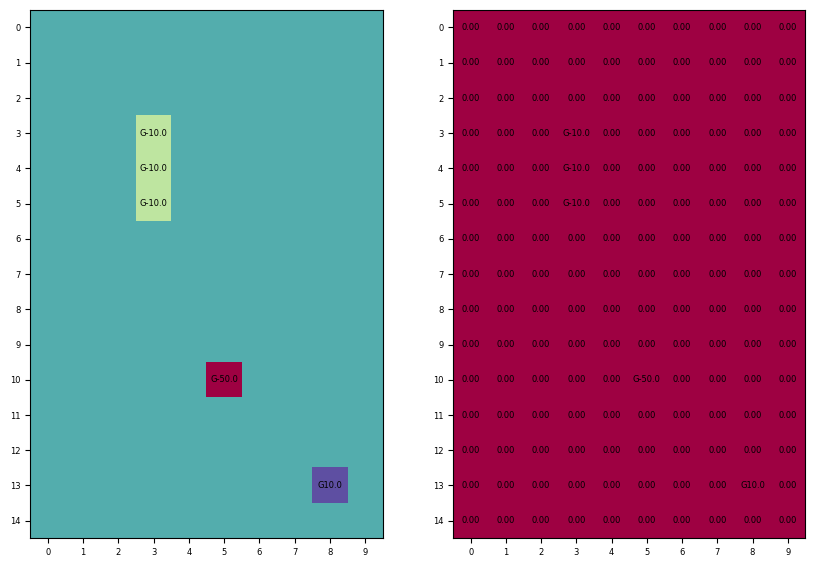

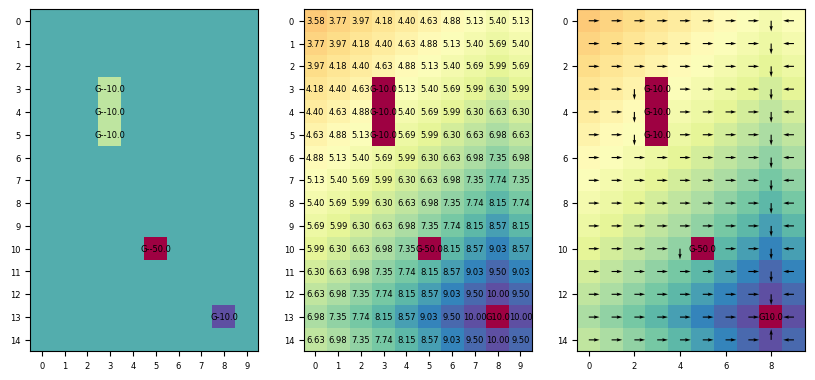

Yes, we converge w.r.t. our tolerance
Distance between V_21(S) and V_22(S) is: 0.0





In [29]:
for num in range(1, 11):

    print("p = ", 0.1*num)
    # Build the world (and initial values)
    World = PY_GW_VI_tools.new_world(Lx=Lx, Ly=Ly, Nblocks=Nblocks, goal=goal, rewards=rewards_list)
    Values = np.zeros((Ly,Lx))

    # Solve and plot
    PY_GW_VI_plot.plot_world_values(World=World, Values=Values)
    World, NewValues, Policy, result_info, num_iter = PY_GW_VI_tools.solve_grid_world(
        World = World,
        initial_values = Values,
        max_n_of_iterations = max_n_of_iterations,
        gamma = gamma,
        tolerance = tolerance,
        possible_actions = Actions,
        p = 0.1*num,
        random_flag=random_flag)
    PY_GW_VI_plot.plot_world_values_policy(World=World, Values=NewValues, Policy=Policy)
    print( PY_GW_VI_tools.get_info_about_result(result_info = result_info) )

    print("\n\n")

Here one can observe a very curious behaviour that, actually, makes perfectly sense. Having a value of `gamma` very high, the agent is aware of the goal-cells in its surroundings and will aim to reach the one that carries the higher reward. However, if we set a low value of `p` the probability to take a wrong action is very high and, being very near to a goal-cell that is not its target, the probability to "fall" into that one is high. Therefore, with low `p` the optimal solution is to take a longer path but in such a way that the agent will not be in the very surroundings of the non-optimal goal-cells, with the fear to fall into one of them.

With an increasing value of `p` also the confidence of the agent increases, so it will tend to take paths that, assuring a lower amount of steps, may also pass in the vicinity of other goal-cells.

Another interesting thing to do may be to also change the value of `gamma`.